# HW2: Exploratory Data Analysis




<span style="color:green">    - Antônio Luís Sombra de Medeiros</span>  
<span style="color:green"> - João Marcos Amorim </span>  
<span style="color:green">     - Renato Aranha</span> 




Guidelines:

- What question do you want to answer?

    
- The classification of Cartola FC follows the table of classification of Brasileirão?

   <span style="color:blue">  
A: We rebuilt the final classification of the championship following its criteria of scoring the same and built the classification after the last of the Brasileirão by the total points made by the club in Cartola FC.  </span>
       
       
- Where have you obtained the data?

   <span style="color:blue"> A: The scraped data from the official Cartola [website] can be found [here]:</span>
    
    
- How were your data manipulation and cleaning?

 <span style="color:blue"> A: We emphasize these aspects on the notebook body </span>
    
    
- Visualize your data from multiple perspectives and indicate if you found outliers, patterns, trends.

  <span style="color:blue"> A: Graphs were created to help understand the variation in player's score and price per position and per year, helping to understand if there was a significant change in the years and we checked the variation of scores and price per position. </span>


- Indicate if your visualizations help you to answer the questions or if you have a more clear idea what path you should follow to corroborate your hypothesis. 


- Give a conclusion of your analysis. 


[website]: http://globoesporte.globo.com/cartola-fc/
[here]: https://github.com/thevtm/CartolaFCDados

# 0. DATA

* Our data can be found at: [https://github.com/thevtm/CartolaFCDados](https://github.com/thevtm/CartolaFCDados)  
It's the record from 2014 to 2017 of Cartola Data (the fantasy game)  


* We have information from players,teams, games and "scouts", which are points for what happened in each game. For example:  
 * We have data for how many goals a players did in a game, how many goals the goalkeeper of each team avoided...


* We basically work with 6 csvs (for each year from 2014 to 2017)


    1. Atletas.csv   (Data of each player)
    2. Clubes.csv    (Data of each Team)
    3. Partidas.csv  (Data of each game)
    4. Posicoes.csv  (Table with all positions possible for a player)
    5. Scouts.csv    (Game data and observations, points etc..)
    6. Status.csv    (Table with all the possible status for a player - Suspenso, Contundido, etc. - )
    
    
    
    
##### METADATA



For Atletas csv:

| Field   | Description |
| ------  | -----------|
| ID       | ID of player.|
| Apelido  | How player is called (nickname) |
| ClubeID  | ID of players' team |
| PosicaoID| ID of Players' position in field (1 = goalkepper,2 = defense,..., 4 = midfielder, 5= attacker, 6 = coach) |
| Ano      | Year the player was playing for this team and in this position |


For Clubes csv:

| Field    | Description|
| ------   | -----------|
| ID       | Team's ID  |
| Nome     | Team's name|
|Abreviacao| Team's Acronym  |
| Slug     | Team's slug |


For Partidas.csv:

| Field        | Description                        |
| ------       | -----------                        |
| Ano          | Game's Year                        |
| CasaID       | Home Team's ID                     |
| ID           | Game's ID                          |
| PlacarCasa   | Number of goals of home team      |
| PlacarVisitante| Number of goals of visiting team |
| Resultado     | Winner of game                    |
| Rodada        | Championship's Round number (for that game) |
| VisitanteID   | Visitor Team's ID                 |


For Posicoes.csv:

| Field    | Description|
| ------   | -----------|
| ID       | Position's ID  |
| Nome     | Position's name|
|Abreviacao| Position's Acronym  |


For Scouts.csv: 

| Field       | Description|
| ------      | -----------|
|Rodada       | Round      |
|ClubeID      | Team's ID  |
|AtletaID     | Players' ID|
|Participou   | If player played on that game or not|
|Pontos       | Number of Cartola points for that game  |
|PontosMedia  | Média de pontos do atleta até esta rodada (inclue rodada atual)  |
|Preco        | Preço do atleta nesta rodada  |
|PrecoVariacao|  Variação do preço da rodada passada para esta |
|FS           | Faltas sofridas  |
|PE           |Passes errados  |
|A            | Assistências |
|FT           | Finalizações na trave  |
|FD           | Finalizações defendidas  |
|FF           | Finalizações para fora  |
|G            | Gols  |
|I            | Impedimentos  |
|PP           | Penaltis perdidos  |
|RB           | Roubadas de bola  |
|FC           | Faltas cometidas  |
|GC           | Gols contras  |
|CA           | Cartões Amarelos  |
|CV           | Cartões Vermelhos  |
|SG           | Jogo sem sofrer gols |
|DD           | Defesas dificeis  |
|DP           | Defesa de penaltis |
|GS           | Gols sofridos  |
|Ano          | Year  |

For Status.csv:


| Field    | Description|
| ------   | -----------|
| ID       | Status's ID  |
| Nome     | Status's name|



# 1. LOADING DATA

In [17]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
sns.set(color_codes=True)


import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [18]:
cwd = os.getcwd()
cwd

'C:\\Users\\Renato Aranha\\Documents\\Mestrado\\Foundation_of_DS\\foundations_of_data_science'

### MERGING DATA FOR ALL YEARS (2014-2017)

In [19]:
atletas_all_years = pd.DataFrame()
clubes_all_years = pd.DataFrame()
partidas_all_years = pd.DataFrame()
posicoes_all_years = pd.DataFrame()
scouts_all_years = pd.DataFrame()
status_all_years = pd.DataFrame()


for i in range(2014, 2018):
    
    path_atl = os.path.join(cwd, str(i)+"/Atletas.csv")    
    path_club = os.path.join(cwd, str(i)+"/Clubes.csv")    
    path_part = os.path.join(cwd, str(i)+"/Partidas.csv")    
    path_pos = os.path.join(cwd, str(i)+"/Posicoes.csv")   
    path_sct = os.path.join(cwd, str(i)+"/Scouts.csv")    
    path_stts = os.path.join(cwd, str(i)+"/Status.csv")
    
    atletas = pd.read_csv(path_atl)
    atletas['Ano'] = i
    clubes = pd.read_csv(path_club)
    #clubes['Ano'] = i
    partidas = pd.read_csv(path_part)
    partidas['Ano'] = i
    posicoes = pd.read_csv(path_pos)
    #posicoes['Ano'] = i
    scouts = pd.read_csv(path_sct)
    scouts['Ano'] = i
    status = pd.read_csv(path_stts)
    #status['Ano'] = i
    
    atletas_all_years = atletas_all_years.append(atletas)
    clubes_all_years = clubes_all_years.append(clubes).drop_duplicates()
    partidas_all_years = partidas_all_years.append(partidas)
    posicoes_all_years = posicoes_all_years.append(posicoes).drop_duplicates()
    scouts_all_years = scouts_all_years.append(scouts)
    status_all_years = status_all_years.append(status).drop_duplicates()

### View merged tables with all years

In [20]:
partidas_all_years.head()

,Ano,CasaID,ID,PlacarCasa,PlacarVisitante,Resultado,Rodada,VisitanteID
0,2014,262,179872,0.0,0.0,Empate,1,290
1,2014,266,179873,3.0,0.0,Casa,1,316
2,2014,276,179874,3.0,0.0,Casa,1,263
3,2014,277,179875,1.0,1.0,Empate,1,292
4,2014,293,179876,1.0,0.0,Casa,1,284


In [21]:
clubes_all_years.head()

,ID,Nome,Abreviacao,Slug
0,262,Flamengo,FLA,flamengo
1,263,Botafogo,BOT,botafogo
2,264,Corinthians,COR,corinthians
3,265,Bahia,BAH,bahia
4,266,Fluminense,FLU,fluminense


# 2. DATA CLEANING AND MANIPULATION

In this stage we create functions to generate consolidated dataframes with games and teams. 
We noticed that we have duplicated observations for Sport Club (SPO, which is also SPT) and so we removed these data from our dataframe.
Also we generate a classification table, adding the points for each victory (3 points), tie (1 point) and loss(0 points) to each teams' scores.

In [22]:
def gera_partidas_com_clubes(partidas_all_years, clubes_all_years):
    partidas_all_years = partidas_all_years.merge(clubes_all_years[['ID','Abreviacao']], how='inner', left_on='CasaID',\
                         right_on='ID')
    partidas_all_years = partidas_all_years.merge(clubes_all_years[['ID','Abreviacao']], how='inner', left_on='VisitanteID',\
                         right_on='ID')
    partidas_all_years = partidas_all_years.drop(labels=['ID_y','ID'], axis = 1)
    partidas_com_clubes = partidas_all_years.rename(columns={'ID_x':'ID_partida','Abreviacao_x':'abrev_clube_casa','Abreviacao_y':'abrev_clube_fora'})
    return partidas_com_clubes

def remove_erros_SPO(partidas_com_clubes):
    a = partidas_com_clubes.copy().drop_duplicates()
    temp = pd.DataFrame(a.groupby(['ID_partida'])['ID_partida'].count())
    temp2 = temp[temp.ID_partida == 2]
    
    a = a[(a.ID_partida.isin(temp2.index))]
    a = a[(a.abrev_clube_casa == 'SPO') | (a.abrev_clube_fora == 'SPO')]
    
    final = partidas_com_clubes[~partidas_com_clubes.index.isin(a.index)]
    partidas_com_clubes_corrigido = final.drop_duplicates()
    
    return partidas_com_clubes_corrigido

def adiciona_pontuacao(partidas_com_clubes_corrigido):
    def pts_casa(casa, fora):
        if casa > fora:
            a = 3
        elif casa < fora:
            a = 0
        else:
            a = 1
        return a

    def pts_fora(casa, fora):
        if casa > fora:
            a = 0
        elif casa < fora:
            a = 3
        else:
            a = 1
        return a
    
    a = partidas_com_clubes_corrigido.copy().drop_duplicates().reset_index()
    a['pts_casa'] = a.apply(lambda x: pts_casa(x.PlacarCasa, x.PlacarVisitante), axis=1)
    a['pts_fora'] = a.apply(lambda x: pts_fora(x.PlacarCasa, x.PlacarVisitante), axis=1)
    
    partidas_com_pontuacao = a
    
    return partidas_com_pontuacao

def gera_classificacao(partidas_com_pontuacao):
    b = partidas_com_pontuacao.copy()
    casa = pd.DataFrame(b.groupby(['Ano','abrev_clube_casa'])['pts_casa'].sum())
    fora = pd.DataFrame(b.groupby(['Ano','abrev_clube_fora'])['pts_fora'].sum())
    tabela = pd.concat([casa, fora], axis=1)
    tabela['pts_total'] = tabela.pts_casa + tabela.pts_fora
    tabela = tabela.reset_index().sort_values(by=['Ano','pts_total'], ascending = [True, False])
    return tabela

In [23]:
partidas_com_clubes = gera_partidas_com_clubes(partidas_all_years, clubes_all_years).drop_duplicates()

partidas_com_clubes_corrigido = remove_erros_SPO(partidas_com_clubes)

partidas_com_pontuacao = adiciona_pontuacao(partidas_com_clubes_corrigido)

tabela = gera_classificacao(partidas_com_pontuacao)

tabela

,Ano,abrev_clube_casa,pts_casa,pts_fora,pts_total
8,2014,CRU,47,33,80
17,2014,SAO,39,31,70
6,2014,COR,42,27,69
14,2014,INT,45,24,69
2,2014,CAM,41,21,62
11,2014,FLU,39,22,61
13,2014,GRE,40,21,61
3,2014,CAP,35,19,54
16,2014,SAN,33,20,53
10,2014,FLA,35,17,52


This tables represents the final scores/classification for each years' championship

In [24]:
#Games(Matches) tables without duplicated values

partidas_com_clubes_corrigido

,Ano,CasaID,ID_partida,PlacarCasa,PlacarVisitante,Resultado,Rodada,VisitanteID,abrev_clube_casa,abrev_clube_fora
0,2014,262,179872,0.0,0.0,Empate,1,290,FLA,GOI
2,2015,262,190387,4.0,1.0,Casa,34,290,FLA,GOI
4,2014,266,180066,2.0,0.0,Casa,13,290,FLU,GOI
6,2015,266,190326,2.0,0.0,Casa,28,290,FLU,GOI
8,2014,276,180145,3.0,0.0,Casa,31,290,SAO,GOI
10,2015,276,190233,0.0,3.0,Visitante,19,290,SAO,GOI
12,2014,277,179998,2.0,0.0,Casa,25,290,SAN,GOI
14,2015,277,190355,3.0,1.0,Casa,31,290,SAN,GOI
16,2014,293,180179,1.0,0.0,Casa,37,290,CAP,GOI
18,2015,293,190261,3.0,0.0,Casa,21,290,CAP,GOI


In [25]:
partidas_com_clubes_corrigido.to_csv('partidas_all_years.csv', sep='\t')

In [26]:
atletas_all_years = atletas_all_years.drop_duplicates(['ID','Ano']) 

In [27]:
scouts_all_years.shape

(125016, 27)

In [28]:
clubes_all_years[['ID','Nome']].drop_duplicates().sort_values(by='ID')

,ID,Nome
0,1,Outros
0,262,Flamengo
1,263,Botafogo
2,264,Corinthians
3,265,Bahia
4,266,Fluminense
3,267,Vasco
5,275,Palmeiras
6,276,São Paulo
7,277,Santos


### Adding player name, team and position

In [29]:
scouts_all_years = scouts_all_years.merge(atletas_all_years[['ID','Apelido','PosicaoID','Ano']], left_on=['AtletaID','Ano'],\
                         right_on=['ID','Ano'],how = 'inner')
print(scouts_all_years.shape)
scouts_all_years = scouts_all_years.drop_duplicates()
print(scouts_all_years.shape)
scouts_all_years = scouts_all_years.merge(posicoes_all_years[['ID','Abreviacao']], left_on = 'PosicaoID',right_on = 'ID')
print(scouts_all_years.shape)
scouts_all_years = scouts_all_years.drop(labels=['ID_y','ID_x'], axis = 1)
print(scouts_all_years.shape)
scouts_all_years = scouts_all_years.merge(clubes_all_years[['ID','Nome']].drop_duplicates().sort_values(by='ID').iloc[1:,:]
                                          ,left_on='ClubeID',right_on='ID')
print(scouts_all_years.shape)



(125016, 30)
(125016, 30)
(125016, 32)
(125016, 30)
(125009, 32)


In [30]:
scouts_all_years.columns

Index(['Rodada', 'ClubeID', 'AtletaID', 'Participou', 'Pontos', 'PontosMedia',
       'Preco', 'PrecoVariacao', 'FS', 'PE', 'A', 'FT', 'FD', 'FF', 'G', 'I',
       'PP', 'RB', 'FC', 'GC', 'CA', 'CV', 'SG', 'DD', 'DP', 'GS', 'Ano',
       'Apelido', 'PosicaoID', 'Abreviacao', 'ID', 'Nome'],
      dtype='object')

### Droping players that din't play any match

In [31]:
print('Tamanho antes de deixar apenas quem jogou')
print(scouts_all_years.shape)
jogaram_all_years = scouts_all_years[scouts_all_years.Participou==True]
print('Tamanho depois de deixar apenas quem jogou')
print(jogaram_all_years.shape)

Tamanho antes de deixar apenas quem jogou
(125009, 32)
Tamanho depois de deixar apenas quem jogou
(43926, 32)


# Linear Regression price and points by positions

Can we find some linear relationship between players performance and their prices?

The conclusion would be the same if we analize this relationship by player position?

The plots below show the scores of players in each round by their prices, and even by eyesight, we can judge that there is no clear pattern.

PS.1: The players prices changes in every round, based on their previous round performance.  
PS.2: We are using data from the championships of all years (2014 to 2016) and there is no inflation.

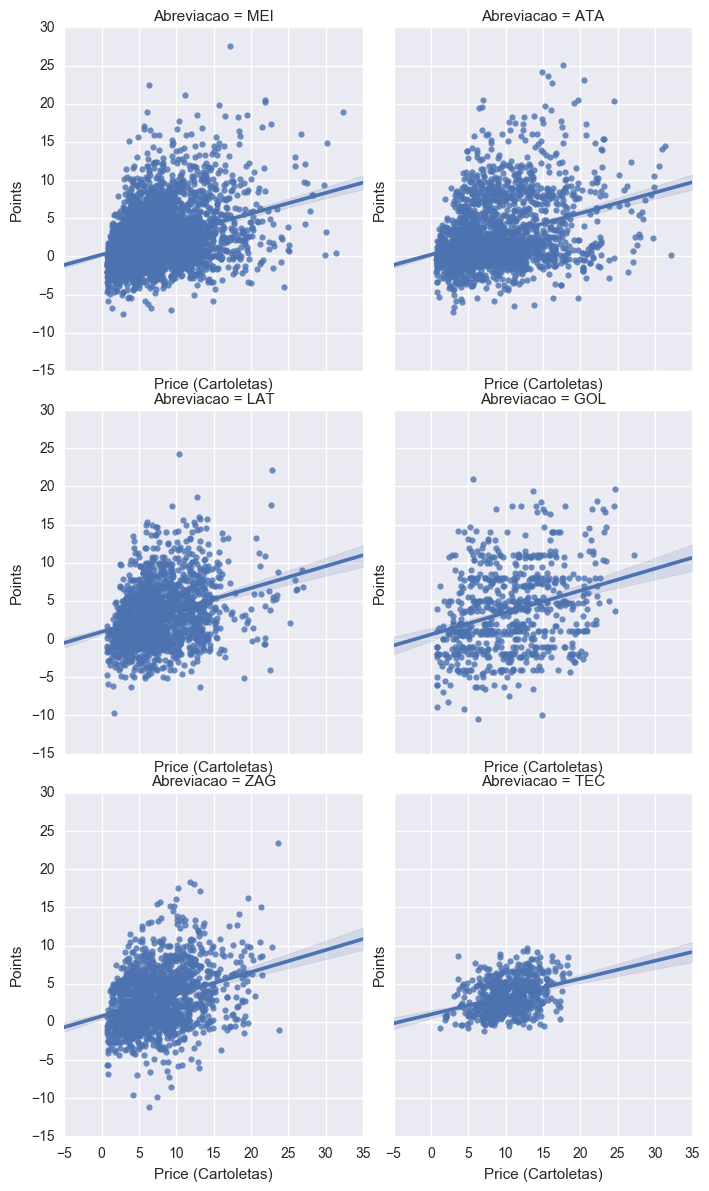

In [33]:
#fig, ax = plt.subplots()
#fig.set_size_inches(16,10)
plt.figure(figsize=(24,4))
vis = sns.lmplot(x="Preco", y="Pontos", data=jogaram_all_years.sample(10000),col='Abreviacao',legend=True,fit_reg=True,\
                 col_wrap=2, size=4,aspect=0.9)
#vis.axes.set_title('Scatter plot of points by price',fontsize=20)
#vis.tick_params(labelsize=15)
vis.set(xlabel='Price (Cartoletas)', ylabel='Points')
plt.show()

### Are there any differences in the score distribution of players, by position?

we can see that the medians of the positions GOL, LAT and ZAG are higher that other positions. 
As can be observed, the coaches have the lowest dispersion in the data, but they are far from reaching a score higher than 10 points. Goalkeepers are the players with the most scattered score, without a punctuation tendency

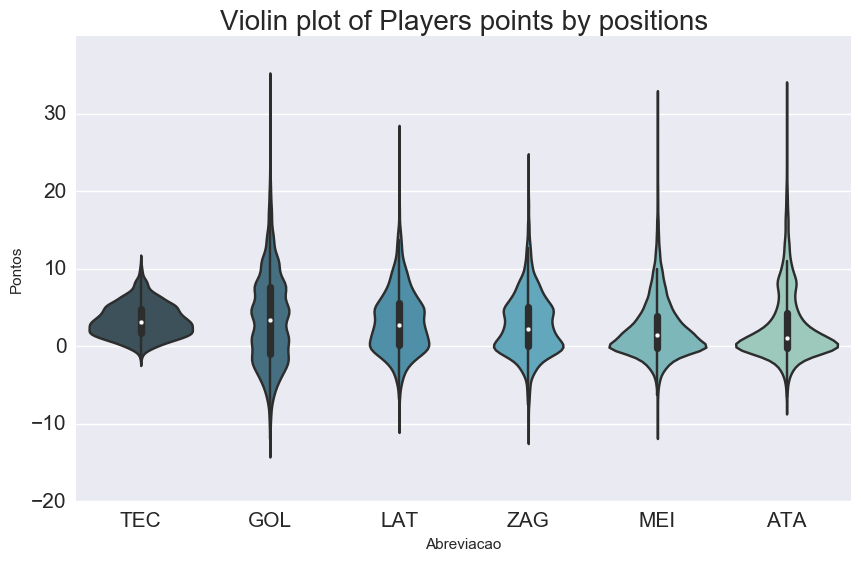

In [34]:
fig, ax = plt.subplots()
fig.set_size_inches(10,6)
position = ['TEC', 'GOL', 'LAT', 'ZAG', 'MEI', 'ATA']
vis = sns.violinplot(data = jogaram_all_years, x='Abreviacao', y="Pontos", palette="GnBu_d",\
                    order=position)
vis.set(yticks=np.arange(-20,40,10))
vis.axes.set_title('Violin plot of Players points by positions', fontsize=20)
vis.tick_params(labelsize=15)
plt.show()

In [35]:
jogaram_all_years.loc[:,['Abreviacao','Pontos']].groupby('Abreviacao').describe()

Pontos                                                    
              count      mean       std    min   25%   50%   75%    max
Abreviacao                                                             
ATA         10031.0  2.622052  4.514388  -7.30 -0.20  1.10  4.30  32.70
GOL          2992.0  3.451972  5.648814 -12.00 -1.00  3.40  7.70  33.00
LAT          6483.0  3.219960  4.089564  -9.70  0.20  2.80  5.60  27.10
MEI         15135.0  2.251457  3.764930 -10.80 -0.20  1.40  3.90  31.90
TEC          2895.0  3.387326  2.106002  -1.62  1.77  3.15  4.85  10.92
ZAG          6390.0  2.787731  3.885621 -11.20  0.00  2.30  5.10  23.50

#### Are there any differences in the price distribution of players, by position?


We can see that similar to the score the coach price is what less varies compared to other positions, and the position of goalkeeper in addition to more dispersed is the most expensive of the game

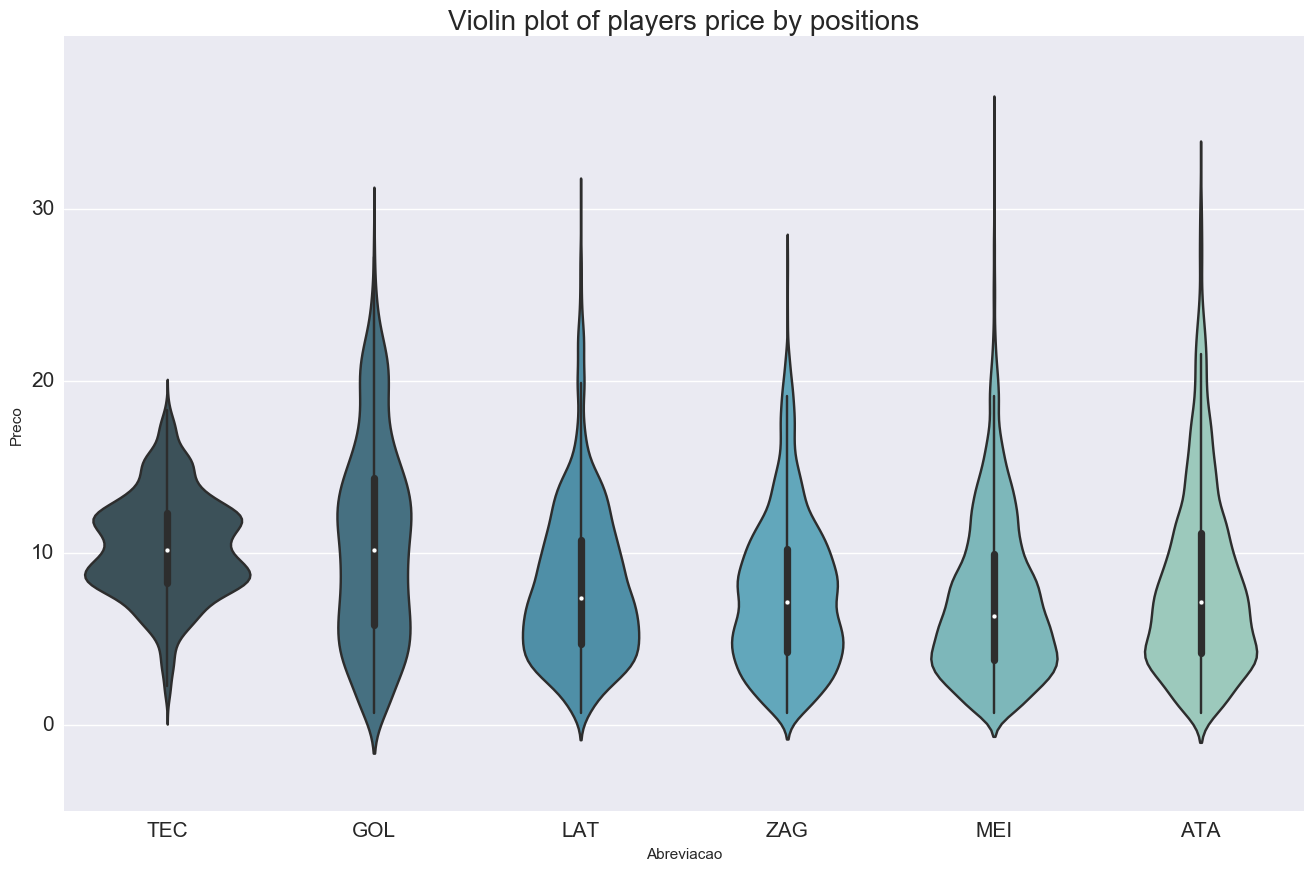

In [36]:
fig, ax = plt.subplots()
fig.set_size_inches(16,10)
position = ['TEC', 'GOL', 'LAT', 'ZAG', 'MEI', 'ATA']
vis = sns.violinplot(data = jogaram_all_years, x='Abreviacao', y="Preco", palette="GnBu_d",\
                    order=position)
vis.set(yticks=np.arange(0,40,10))
vis.axes.set_title('Violin plot of players price by positions', fontsize=20)
vis.tick_params(labelsize=15)
plt.show()

In [37]:
jogaram_all_years.loc[:,['Abreviacao','Preco']].groupby('Abreviacao').describe()

Preco                                                          
              count       mean       std   min     25%     50%     75%    max
Abreviacao                                                                   
ATA         10031.0   8.328659  5.442315  0.73  4.2100   7.160  11.155  32.20
GOL          2992.0  10.571664  5.780718  0.71  5.8275  10.195  14.370  28.91
LAT          6483.0   8.091390  4.493215  0.71  4.7000   7.360  10.770  30.22
MEI         15135.0   7.345179  4.651599  0.71  3.8100   6.350   9.945  35.18
TEC          2895.0  10.337212  2.989777  1.28  8.2850  10.180  12.320  18.87
ZAG          6390.0   7.635344  4.358091  0.71  4.2700   7.130  10.220  27.00

### Are there any differences in the variation of price distribution of players, by position?

As we can see the coaches are the ones who have the lowest price variation from one round to another compared to the other positions.

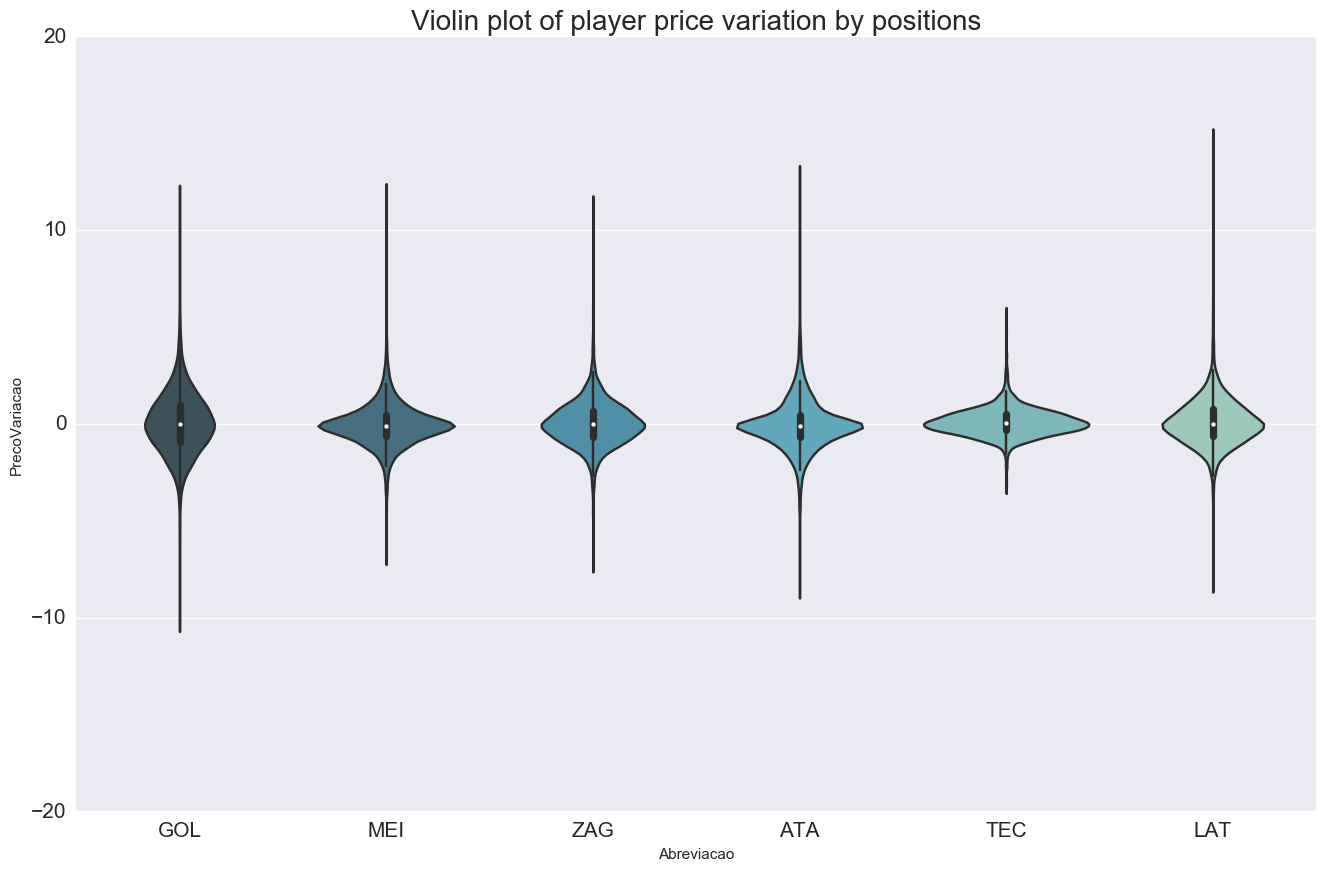

In [38]:
fig, ax = plt.subplots()
fig.set_size_inches(16,10)
vis = sns.violinplot(data = jogaram_all_years, x='Abreviacao', y="PrecoVariacao", palette="GnBu_d")
vis.set(yticks=np.arange(-20,30,10))
vis.axes.set_title('Violin plot of player price variation by positions',fontsize=20)
vis.tick_params(labelsize=15)
plt.show()



In [39]:
jogaram_all_years.loc[:,['Abreviacao','PrecoVariacao']].groupby('Abreviacao').describe()

PrecoVariacao                                                    
                   count      mean       std    min   25%   50%   75%    max
Abreviacao                                                                  
ATA              10031.0 -0.036044  1.323370  -8.57 -0.68 -0.11  0.47  12.91
GOL               2992.0  0.034515  1.620233 -10.07 -0.95 -0.01  0.99  11.66
LAT               6483.0  0.085837  1.226605  -8.26 -0.64  0.00  0.74  14.80
MEI              15135.0 -0.045921  1.104961  -6.94 -0.61 -0.09  0.45  12.08
TEC               2895.0  0.091264  0.699464  -3.31 -0.34  0.04  0.49   5.72
ZAG               6390.0  0.024496  1.171158  -7.24 -0.68 -0.02  0.67  11.36

In [40]:
jogaram_all_years.head()

,Rodada,ClubeID,AtletaID,Participou,Pontos,PontosMedia,Preco,PrecoVariacao,FS,PE,...,SG,DD,DP,GS,Ano,Apelido,PosicaoID,Abreviacao,ID,Nome
1,1,285,36443,True,5.0,5.00,10.60,1.60,0,0,...,1,0,0,0,2014,Dida,1,GOL,285,Internacional
2,2,285,36443,True,-3.0,1.00,8.27,-2.33,2,0,...,0,0,0,2,2014,Dida,1,GOL,285,Internacional
3,3,285,36443,True,-2.6,-0.20,6.81,-1.46,0,2,...,0,0,0,1,2014,Dida,1,GOL,285,Internacional
4,4,285,36443,True,4.0,0.85,7.96,1.15,0,0,...,0,2,0,1,2014,Dida,1,GOL,285,Internacional
5,5,285,36443,True,5.0,1.68,8.61,0.65,0,0,...,1,0,0,0,2014,Dida,1,GOL,285,Internacional


### filtering the 4 best and 4 worst teams of each year

In [41]:
l2014 = ['Cruzeiro','São Paulo','Internacional','Corinthians','Vitória','Bahia','Botafogo','Criciúma']
l2015 = ['Corinthians','Atlético-MG','Grêmio','São Paulo','Avaí','Vasco','Goiás','Joinville']
l2016 = ['Palmeiras','Santos','Flamengo','Atlético-MG','Internacional','Figueirense','Santa Cruz','América-MG']
l2017 = ['Corinthians','Palmeiras','Santos','Grêmio','Coritiba','Avaí','Ponte Preta','Atlético-GO']

In [42]:
aux = jogaram_all_years[(jogaram_all_years.Ano ==2014) & jogaram_all_years.Nome.isin(l2014) ]

### Is there any price difference between the top 4 and 4 worst teams?
we can see that the players of the team with the best performance in the league had a higher price in the game during the year.

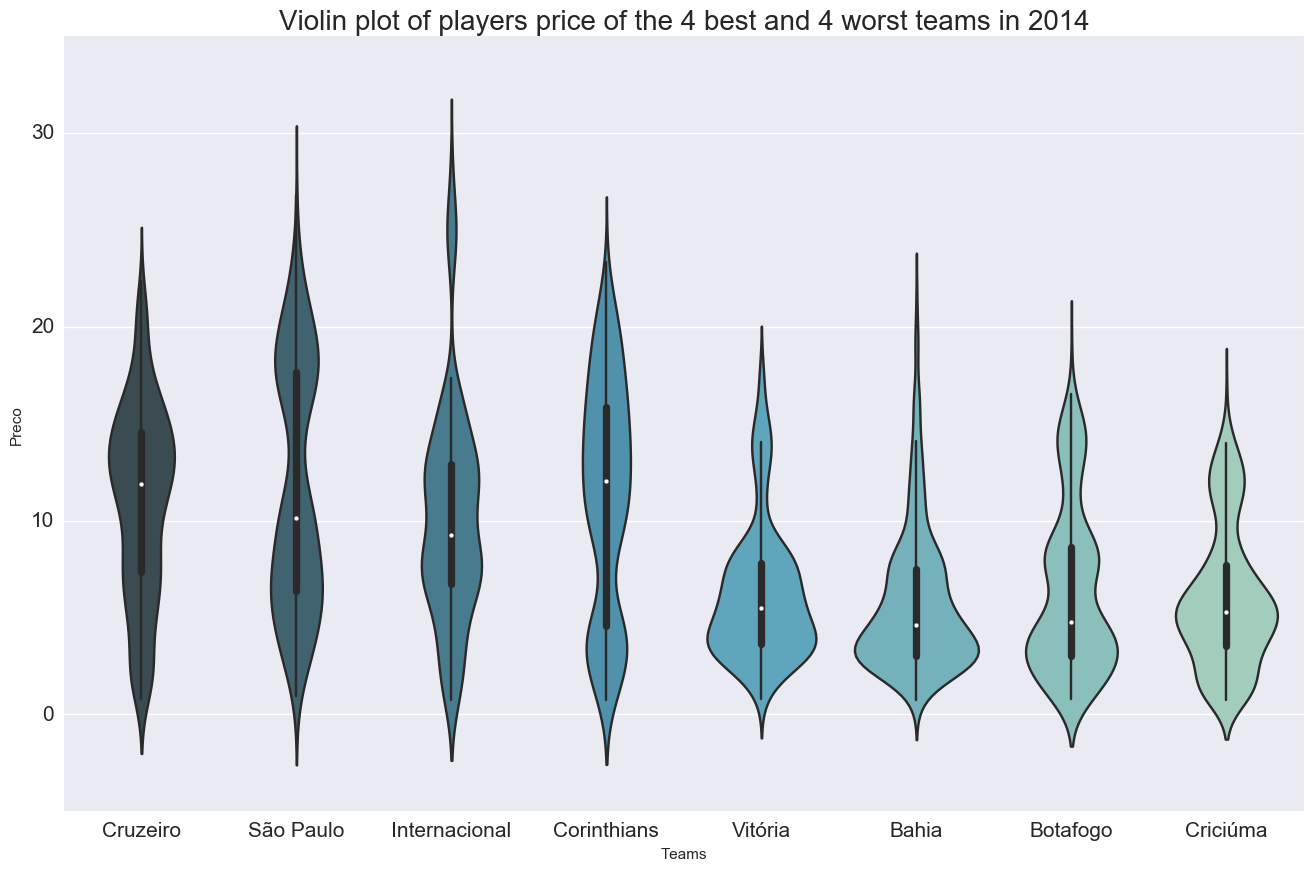

In [43]:
fig, ax = plt.subplots()
fig.set_size_inches(16,10)
vis = sns.violinplot(data = aux, x='Nome', y="Preco", palette="GnBu_d",order=l2014)
vis.set(yticks=np.arange(0,40,10))
vis.axes.set_title('Violin plot of players price of the 4 best and 4 worst teams in 2014',fontsize=20)
vis.tick_params(labelsize=15)
vis.set_xlabel('Teams')
plt.show()

In [44]:
aux[['Nome','Preco']].groupby('Nome').describe()

Preco                                                          
               count       mean       std   min    25%     50%      75%    max
Nome                                                                          
Bahia          546.0   5.741538  3.638567  0.76  3.020   4.625   7.4875  21.75
Botafogo       552.0   6.362464  4.285090  0.79  2.995   4.795   8.6500  18.93
Corinthians    573.0  11.273316  5.962011  0.77  4.580  12.070  15.8600  23.37
Criciúma       580.0   6.002621  3.628096  0.76  3.515   5.305   7.7175  16.86
Cruzeiro       569.0  11.012390  4.968085  0.78  7.350  11.910  14.5800  22.35
Internacional  552.0  10.142283  5.550267  0.77  6.740   9.285  12.9525  28.62
São Paulo      541.0  11.643789  6.292728  0.97  6.360  10.130  17.6900  26.81
Vitória        554.0   6.272816  3.560000  0.80  3.630   5.495   7.8125  18.03

### Is there any difference in score between the top 4 and 4 worst teams?
We can see that the top 4 teams have the median higher than the 4 worst teams and the third quartile of the relegationed teams have been far from the third quartile of the top 4 teams.

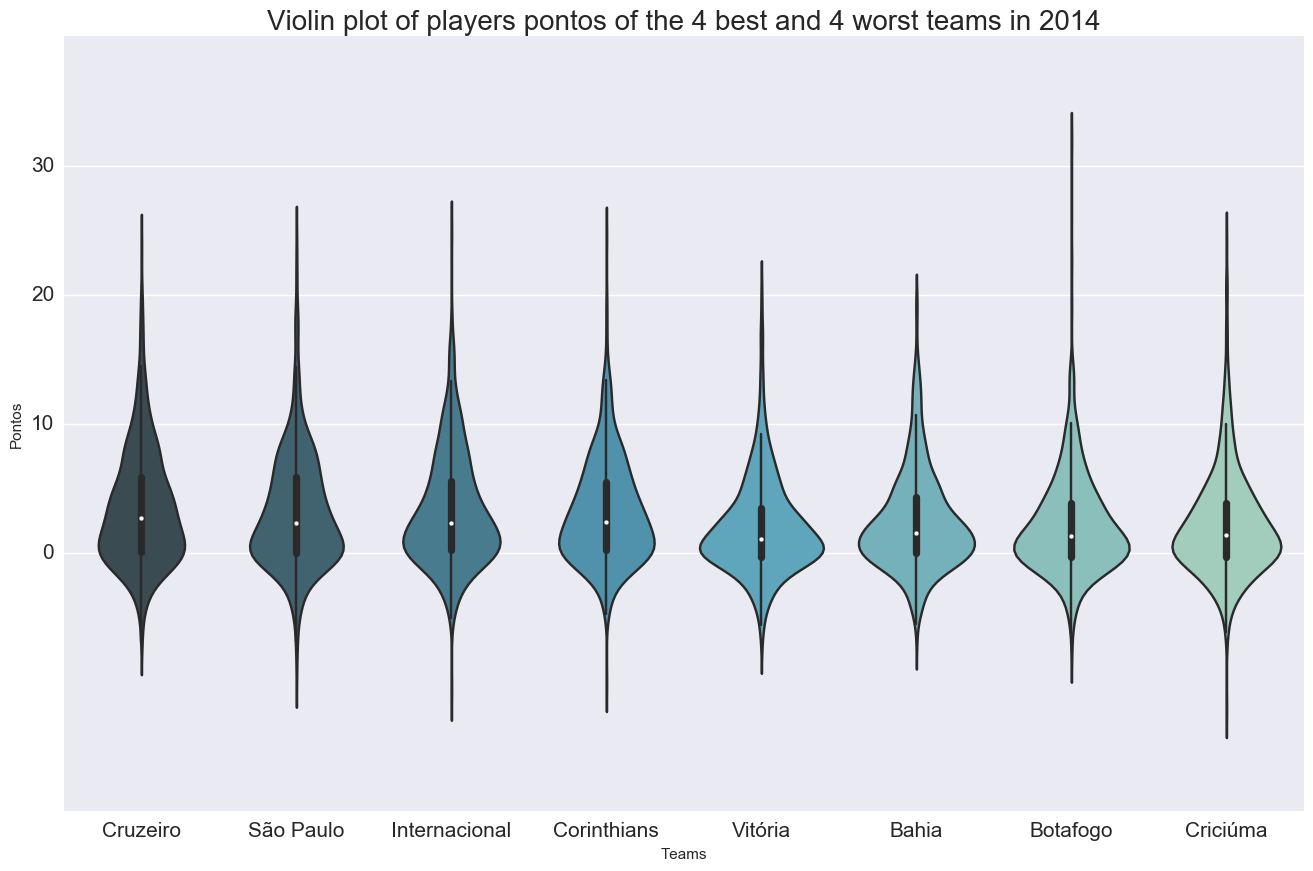

In [45]:
fig, ax = plt.subplots()
fig.set_size_inches(16,10)
vis = sns.violinplot(data = aux, x='Nome', y="Pontos", palette="GnBu_d",order=l2014)
vis.set(yticks=np.arange(0,40,10))
vis.axes.set_title('Violin plot of players pontos of the 4 best and 4 worst teams in 2014',fontsize=20)
vis.tick_params(labelsize=15)
vis.set_xlabel('Teams')
plt.show()

In [46]:
aux[['Nome','Pontos']].groupby('Nome').describe()

Pontos                                                   
               count      mean       std   min  25%   50%     75%   max
Nome                                                                   
Bahia          546.0  2.429799  3.853280  -6.8  0.0  1.58  4.3000  19.4
Botafogo       552.0  2.166467  3.899744  -7.8 -0.3  1.30  3.9000  31.9
Corinthians    573.0  3.181361  4.052740 -10.0  0.2  2.40  5.5000  24.5
Criciúma       580.0  2.171569  4.094138 -12.0 -0.3  1.39  3.9000  24.1
Cruzeiro       569.0  3.479262  4.488814  -6.9  0.1  2.70  5.9100  23.7
Internacional  552.0  3.263152  4.329425 -10.5  0.2  2.30  5.5375  24.8
São Paulo      541.0  3.182440  4.473730  -9.4  0.0  2.30  5.9000  24.3
Vitória        554.0  2.030415  3.751468  -7.2 -0.3  1.10  3.5000  20.5

In [47]:
aux = jogaram_all_years[(jogaram_all_years.Ano ==2015) & jogaram_all_years.Nome.isin(l2015) ]

### Is there any price difference between the top 4 and 4 worst teams?
we can see that the players of the team with the best performance in the league had a higher price in the game during the year.

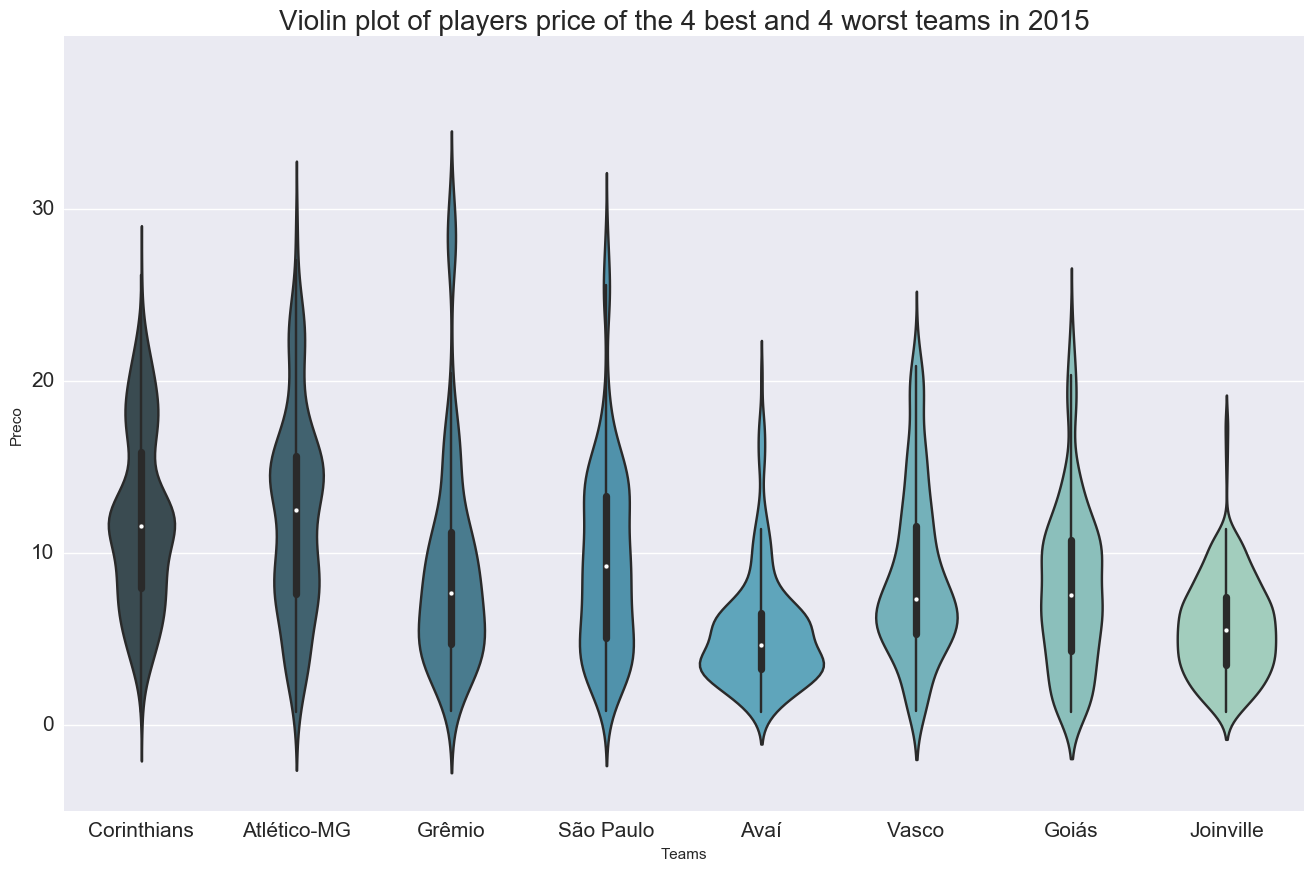

In [48]:
fig, ax = plt.subplots()
fig.set_size_inches(16,10)
vis = sns.violinplot(data = aux, x='Nome', y="Preco", palette="GnBu_d",order=l2015)
vis.set(yticks=np.arange(0,40,10))
vis.axes.set_title('Violin plot of players price of the 4 best and 4 worst teams in 2015',fontsize=20)
vis.tick_params(labelsize=15)
vis.set_xlabel('Teams')
plt.show()

In [49]:
aux[['Nome','Preco']].groupby('Nome').describe()

Preco                                                           
             count       mean       std   min     25%     50%      75%    max
Nome                                                                         
Atlético-MG  511.0  12.266399  5.926076  0.79  7.6150  12.490  15.6050  29.35
Avaí         544.0   5.389614  3.319537  0.79  3.2775   4.640   6.5200  20.46
Corinthians  547.0  11.850530  5.059096  0.79  7.9650  11.590  15.8500  26.14
Goiás        541.0   8.034824  4.812748  0.79  4.3300   7.590  10.7600  23.82
Grêmio       547.0   9.210329  6.315976  0.82  4.7100   7.680  11.2050  30.93
Joinville    546.0   5.679341  2.840686  0.79  3.5025   5.530   7.4575  17.56
São Paulo    534.0   9.632959  5.579583  0.83  5.0425   9.265  13.2925  28.91
Vasco        534.0   8.672491  4.919139  0.81  5.2825   7.325  11.5850  22.40

# 2015

### Is there any difference in score between the top 4 and 4 worst teams?
We can see that the top 4 teams have the median higher than the 4 worst teams and the third quartile of the relegationed teams have been far from the third quartile of the top 4 teams.with Goiás performing similarly to the team.

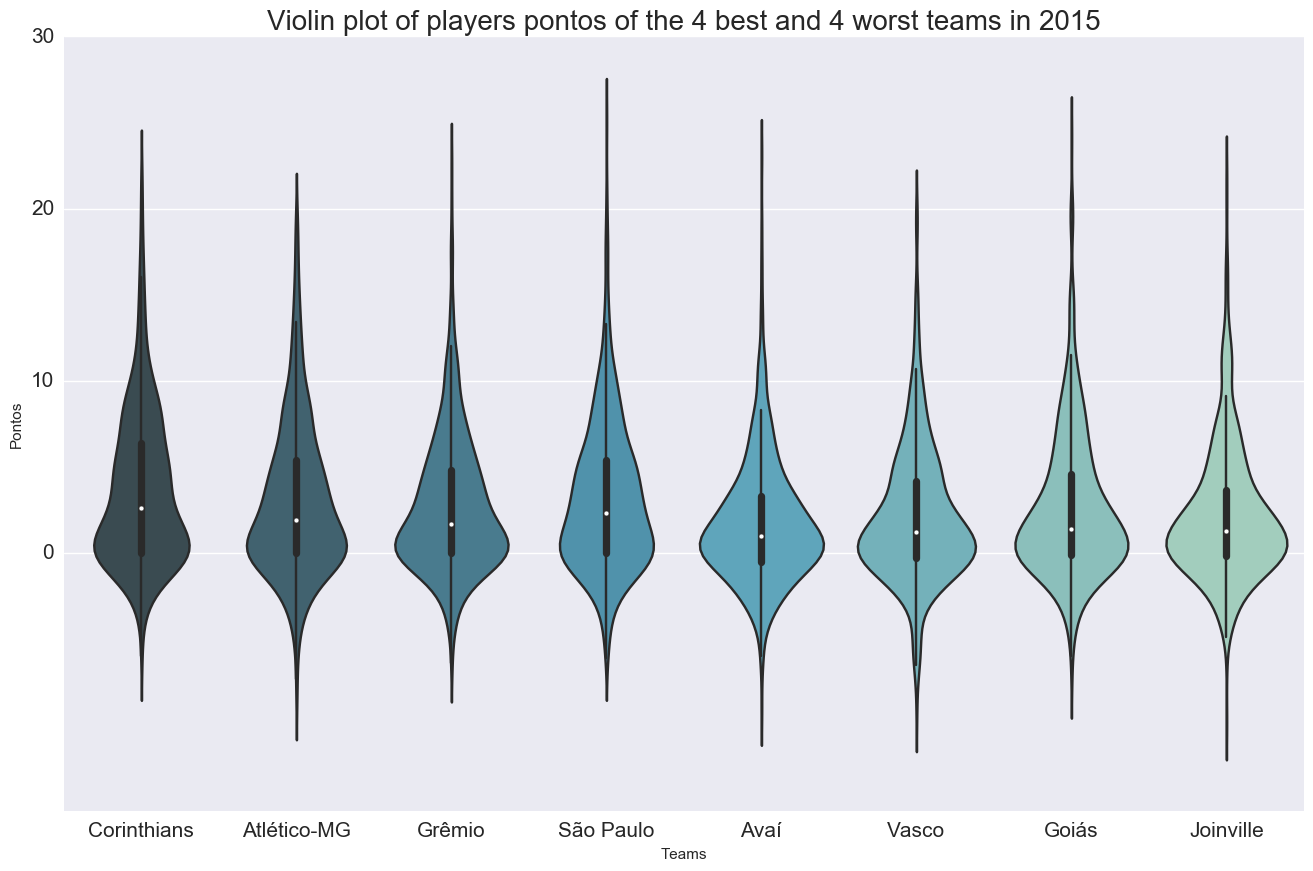

In [50]:
fig, ax = plt.subplots()
fig.set_size_inches(16,10)
vis = sns.violinplot(data = aux, x='Nome', y="Pontos", palette="GnBu_d",order=l2015)
vis.set(yticks=np.arange(0,40,10))
vis.axes.set_title('Violin plot of players pontos of the 4 best and 4 worst teams in 2015',fontsize=20)
vis.tick_params(labelsize=15)
vis.set_xlabel('Teams')
plt.show()

In [51]:
aux[['Nome','Pontos']].groupby('Nome').describe()

Pontos                                                   
             count      mean       std  min  25%    50%     75%   max
Nome                                                                 
Atlético-MG  511.0  3.027436  4.430215 -8.3  0.0  1.900  5.3800  19.5
Avaí         544.0  1.759688  3.643267 -9.1 -0.5  1.000  3.3025  23.1
Corinthians  547.0  3.669927  4.508892 -6.0  0.0  2.600  6.4000  22.0
Goiás        541.0  2.598170  4.206555 -7.2 -0.1  1.410  4.6000  24.1
Grêmio       547.0  2.729013  3.968521 -6.4  0.0  1.700  4.8000  22.7
Joinville    546.0  2.161557  3.901198 -9.8 -0.2  1.300  3.6750  22.0
São Paulo    534.0  3.174120  4.307664 -6.1  0.0  2.325  5.3800  25.1
Vasco        534.0  2.067734  3.926377 -9.3 -0.3  1.200  4.2000  20.0

# 2016

In [52]:
aux = jogaram_all_years[(jogaram_all_years.Ano ==2016) & jogaram_all_years.Nome.isin(l2016) ]

### Is there any price difference between the top 4 and 4 worst teams?
we can see that the players of the team with the best performance in the league had a higher price in the game during the year.
With the Santa Cruz having a player like outlier, that was the Graffiti.

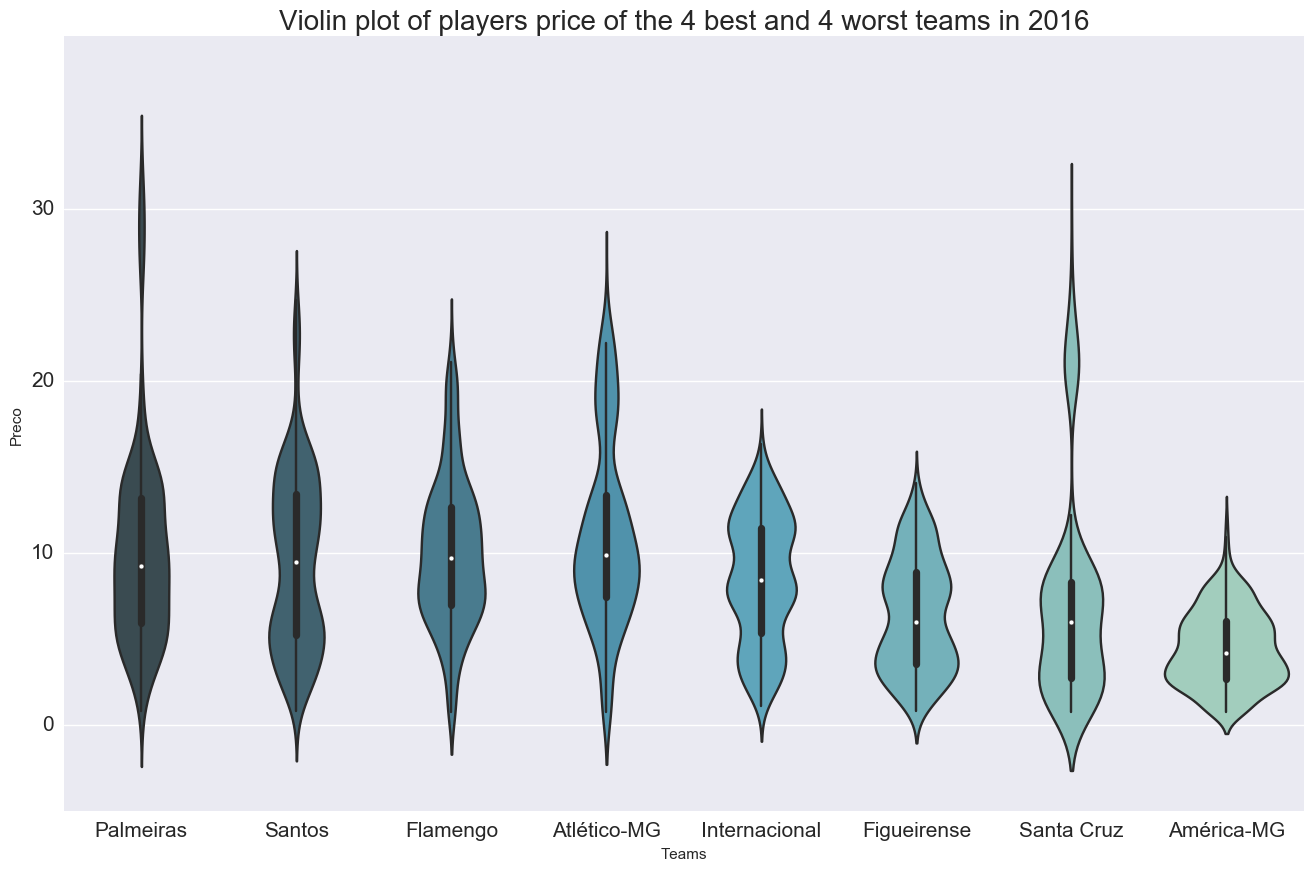

In [53]:
fig, ax = plt.subplots()
fig.set_size_inches(16,10)
vis = sns.violinplot(data = aux, x='Nome', y="Preco", palette="GnBu_d",order=l2016)
vis.set(yticks=np.arange(0,40,10))
vis.axes.set_title('Violin plot of players price of the 4 best and 4 worst teams in 2016',fontsize=20)
vis.tick_params(labelsize=15)
vis.set_xlabel('Teams')
plt.show()

In [54]:
aux[['Nome','Preco']].groupby('Nome').describe()

Preco                                                          
               count       mean       std   min     25%    50%      75%    max
Nome                                                                          
América-MG     543.0   4.461013  2.202331  0.77  2.7000  4.190   6.0400  12.04
Atlético-MG    549.0  11.058980  5.370020  0.77  7.4700  9.890  13.3800  25.63
Figueirense    550.0   6.397018  3.249208  0.81  3.5625  6.015   8.8875  14.07
Flamengo       562.0  10.008274  4.299794  0.74  6.9825  9.700  12.6700  22.33
Internacional  566.0   8.410848  3.641567  1.12  5.3275  8.410  11.4375  16.31
Palmeiras      567.0  10.132275  5.716830  0.82  5.9500  9.240  13.1950  32.20
Santa Cruz     546.0   7.033626  5.994171  0.77  2.7200  6.015   8.3000  29.22
Santos         562.0   9.560107  5.092352  0.80  5.2575  9.505  13.4525  24.69

### Is there any difference in score between the top 4 and 4 worst teams?
We can see that the top 4 teams have the median higher than the 4 worst teams and the third quartile of the relegationed teams have been far from the third quartile of the top 4 teams.

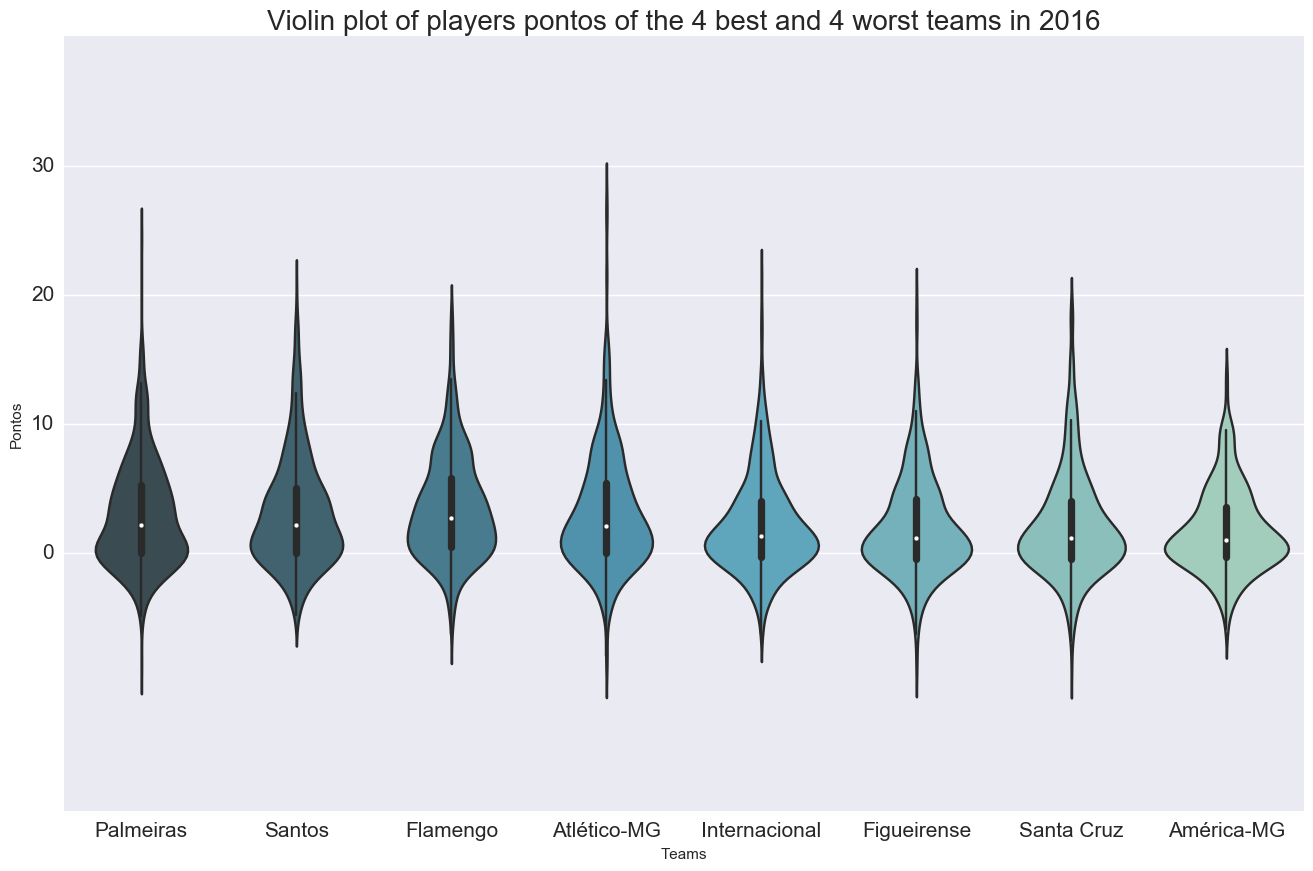

In [55]:
fig, ax = plt.subplots()
fig.set_size_inches(16,10)
vis = sns.violinplot(data = aux, x='Nome', y="Pontos", palette="GnBu_d",order=l2016)
vis.set(yticks=np.arange(0,40,10))
vis.axes.set_title('Violin plot of players pontos of the 4 best and 4 worst teams in 2016',fontsize=20)
vis.tick_params(labelsize=15)
vis.set_xlabel('Teams')
plt.show()

In [56]:
aux[['Nome','Pontos']].groupby('Nome').describe()

Pontos                                                     
               count      mean       std  min    25%    50%     75%   max
Nome                                                                     
América-MG     543.0  1.704715  3.243830 -6.3 -0.345  1.000  3.6000  14.0
Atlético-MG    549.0  3.136102  4.584394 -8.6  0.000  2.100  5.4000  27.6
Figueirense    550.0  1.958655  3.767662 -9.0 -0.500  1.200  4.2000  19.9
Flamengo       562.0  3.520302  4.011410 -6.3  0.500  2.730  5.8375  18.5
Internacional  566.0  2.151148  3.742376 -6.3 -0.300  1.290  3.9975  21.4
Palmeiras      567.0  2.957884  4.088315 -8.6  0.000  2.200  5.3000  24.4
Santa Cruz     546.0  2.164560  4.101925 -8.9 -0.500  1.200  3.9925  19.0
Santos         562.0  3.169270  4.264291 -4.8  0.025  2.175  5.0000  20.3

# 2017

In [57]:
aux = jogaram_all_years[(jogaram_all_years.Ano ==2017) & jogaram_all_years.Nome.isin(l2017) ]

### Is there any price difference between the top 4 and 4 worst teams?

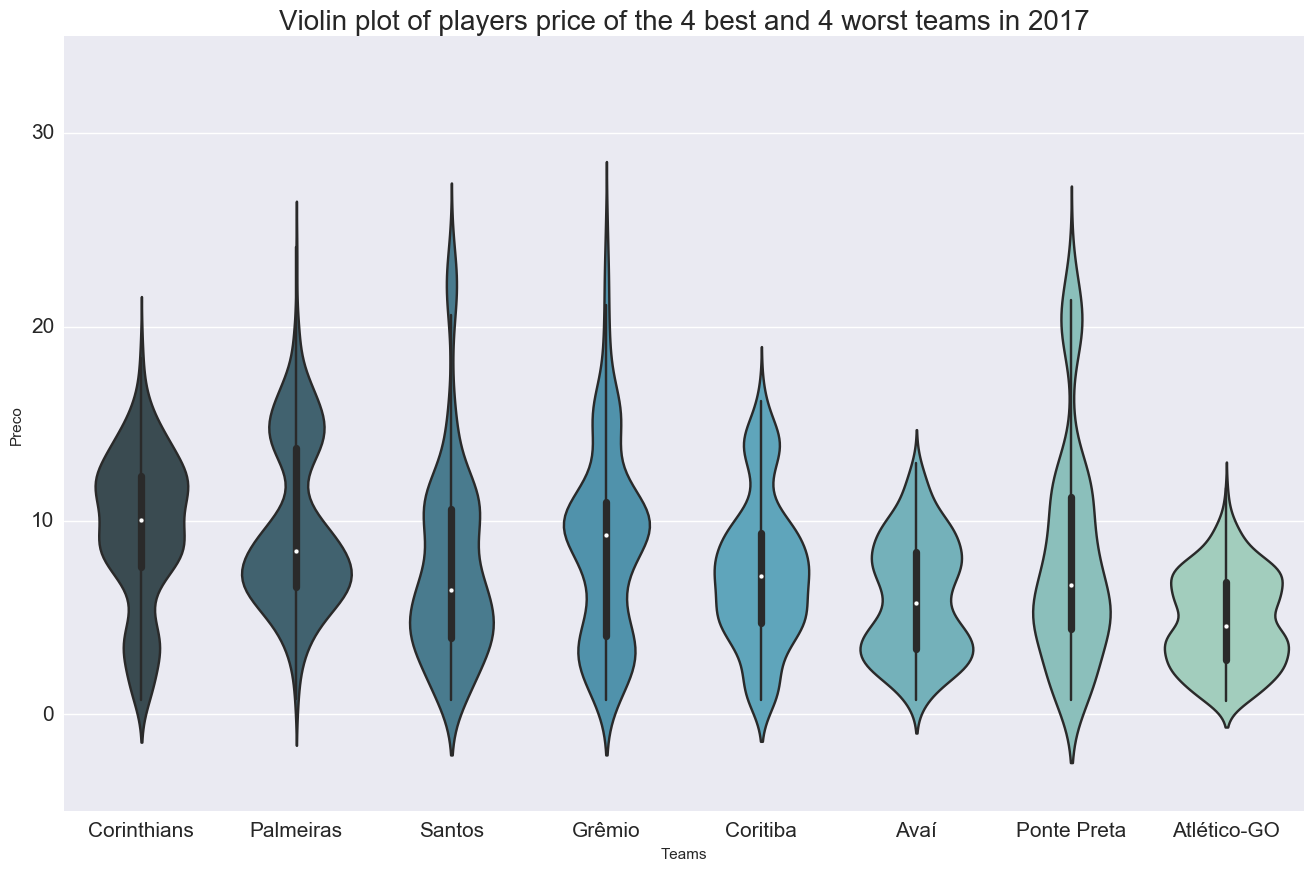

In [58]:
fig, ax = plt.subplots()
fig.set_size_inches(16,10)
vis = sns.violinplot(data = aux, x='Nome', y="Preco", palette="GnBu_d",order=l2017)
vis.set(yticks=np.arange(0,40,10))
vis.axes.set_title('Violin plot of players price of the 4 best and 4 worst teams in 2017',fontsize=20)
vis.tick_params(labelsize=15)
vis.set_xlabel('Teams')
plt.show()

In [59]:
aux[['Nome','Preco']].groupby('Nome').describe()

Preco                                                          
             count      mean       std   min     25%     50%      75%    max
Nome                                                                        
Atlético-GO  554.0  4.846895  2.403921  0.71  2.8050   4.580   6.8150  11.67
Avaí         555.0  5.973820  3.006962  0.74  3.3900   5.730   8.3950  13.00
Corinthians  538.0  9.537937  3.868385  0.77  7.6225  10.040  12.2950  19.37
Coritiba     556.0  7.347050  3.745121  0.73  4.7175   7.130   9.3800  16.87
Grêmio       534.0  8.777135  4.967521  0.74  4.0700   9.260  10.9900  25.71
Palmeiras    557.0  9.654201  4.199358  0.78  6.5800   8.420  13.7300  24.12
Ponte Preta  526.0  8.198023  5.698398  0.77  4.3900   6.705  11.2175  24.02
Santos       543.0  7.667901  5.021518  0.76  3.9300   6.410  10.6100  24.58

### Is there any difference in score between the top 4 and 4 worst teams?
We can see that the top 4 teams have the median higher than the 4 worst teams and the third quartile of the relegationed teams have been far from the third quartile of the top 4 teams.

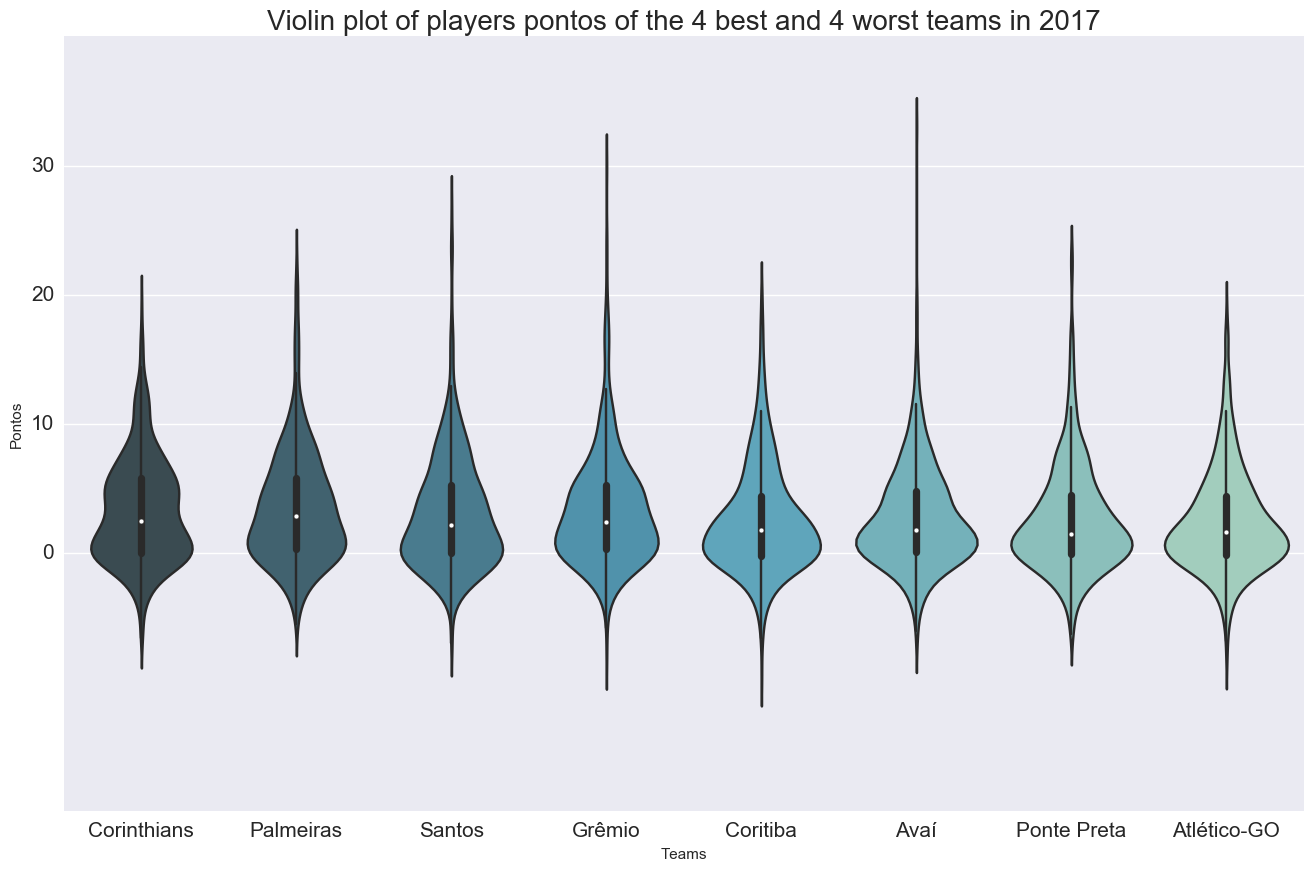

In [60]:
fig, ax = plt.subplots()
fig.set_size_inches(16,10)
vis = sns.violinplot(data = aux, x='Nome', y="Pontos", palette="GnBu_d",order=l2017)
vis.set(yticks=np.arange(0,40,10))
vis.axes.set_title('Violin plot of players pontos of the 4 best and 4 worst teams in 2017',fontsize=20)
vis.tick_params(labelsize=15)
vis.set_xlabel('Teams')
plt.show()

In [61]:
aux[['Nome','Pontos']].groupby('Nome').describe()

Pontos                                                    
             count      mean       std  min    25%   50%     75%   max
Nome                                                                  
Atlético-GO  554.0  2.391408  3.923824 -8.3 -0.175  1.60  4.4000  18.8
Avaí         555.0  2.745928  3.992129 -7.0  0.100  1.80  4.8000  33.0
Corinthians  538.0  3.268420  4.046728 -6.6  0.000  2.50  5.7975  19.2
Coritiba     556.0  2.578040  4.142527 -9.5 -0.200  1.80  4.4150  20.2
Grêmio       534.0  3.373390  4.466973 -8.0  0.300  2.40  5.3000  29.9
Palmeiras    557.0  3.493645  4.361975 -5.5  0.300  2.86  5.8000  22.6
Ponte Preta  526.0  2.589144  4.139698 -6.3 -0.100  1.50  4.4750  23.0
Santos       543.0  3.073554  4.432293 -7.0  0.000  2.20  5.3000  26.7

### Are there any differences in the price distribution of players, by years?

As we can see there is no difference in the distribution of players' price over the years.

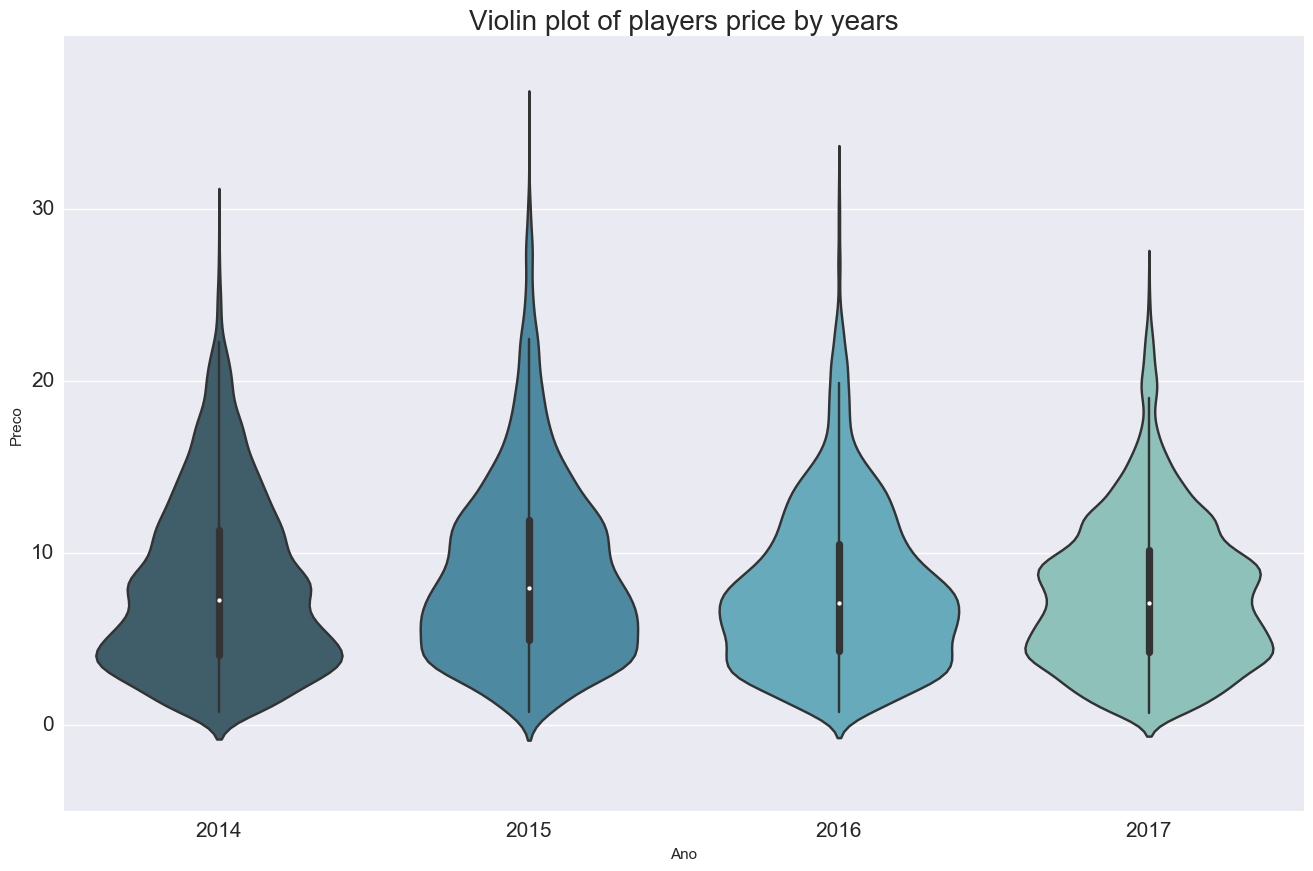

In [63]:
fig, ax = plt.subplots()
fig.set_size_inches(16,10)
vis = sns.violinplot(data = jogaram_all_years, x='Ano', y="Preco", palette="GnBu_d")
vis.set(yticks=np.arange(0,40,10))
vis.axes.set_title('Violin plot of players price by years',fontsize=20)
vis.tick_params(labelsize=15)
plt.show()

In [64]:
jogaram_all_years.loc[:,['Ano','Preco']].groupby('Ano').describe()

Preco                                                    
        count      mean       std   min   25%   50%    75%    max
Ano                                                              
2014  11171.0  8.127548  5.038841  0.76  4.09  7.26  11.35  29.61
2015  10756.0  8.970008  5.304643  0.79  4.93  7.99  11.94  35.18
2016  11061.0  7.875245  4.703516  0.74  4.29  7.09  10.53  32.20
2017  10938.0  7.600541  4.313538  0.71  4.25  7.12  10.16  26.23

### Are there any differences in the points distribution of players, by years?

As we can see there is no difference in the distribution of players' scores over the years.

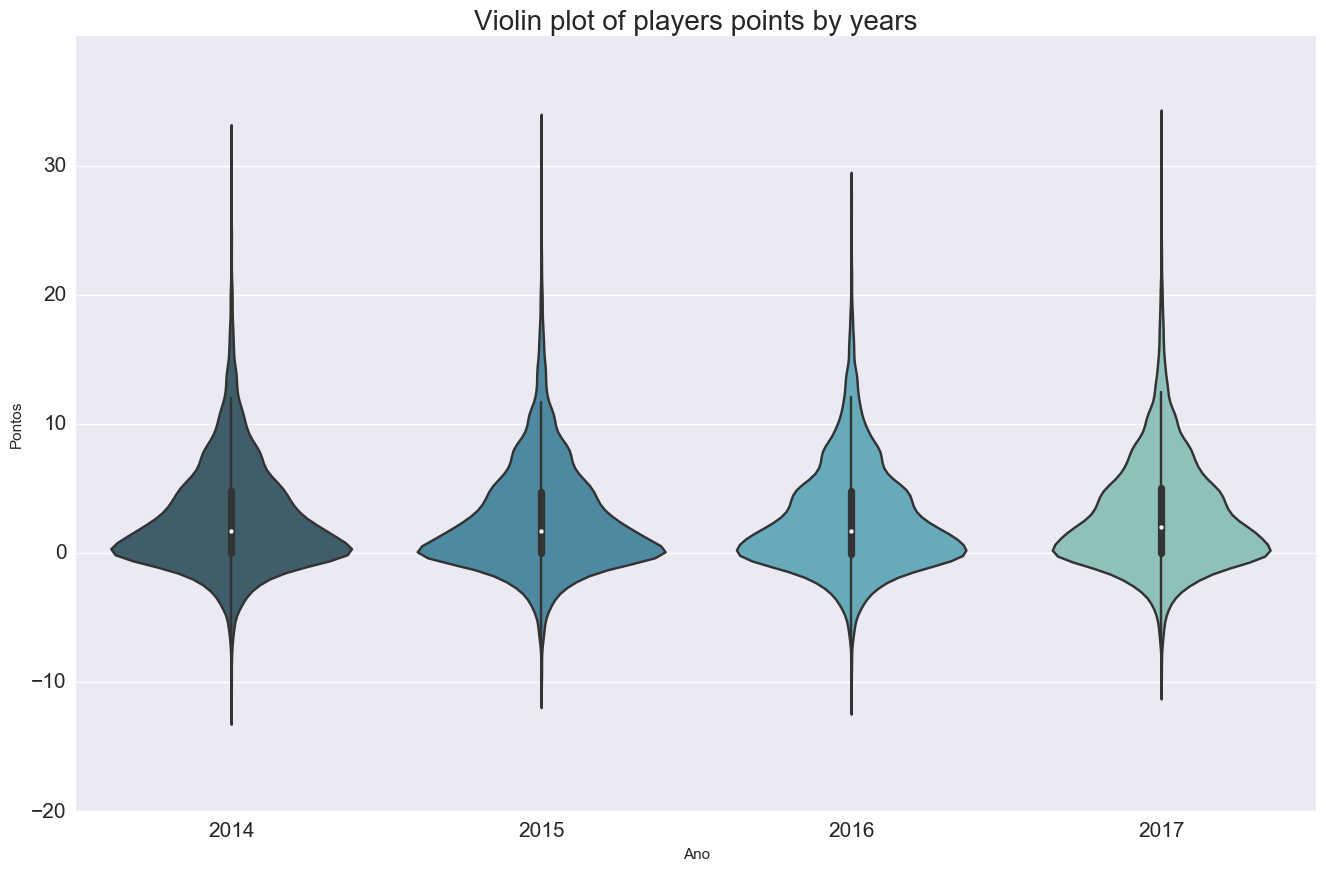

In [65]:
fig, ax = plt.subplots()
fig.set_size_inches(16,10)
vis = sns.violinplot(data = jogaram_all_years, x='Ano', y="Pontos", palette="GnBu_d")
vis.set(yticks=np.arange(-20,40,10))
vis.axes.set_title('Violin plot of players points by years',fontsize=20)
vis.tick_params(labelsize=15)
plt.show()

In [66]:
jogaram_all_years.loc[:,['Ano','Pontos']].groupby('Ano').describe()

Pontos                                               
        count      mean       std   min  25%  50%  75%   max
Ano                                                         
2014  11171.0  2.692419  4.065203 -12.0  0.0  1.7  4.8  31.9
2015  10756.0  2.620201  4.075696 -10.7  0.0  1.7  4.7  32.7
2016  11061.0  2.633802  4.104931 -11.2 -0.1  1.7  4.8  28.2
2017  10938.0  2.908067  4.166195 -10.0  0.0  2.0  5.0  33.0

### Are there any differences in the variation of price distribution of players, by years?


We can see that there is no difference between the years

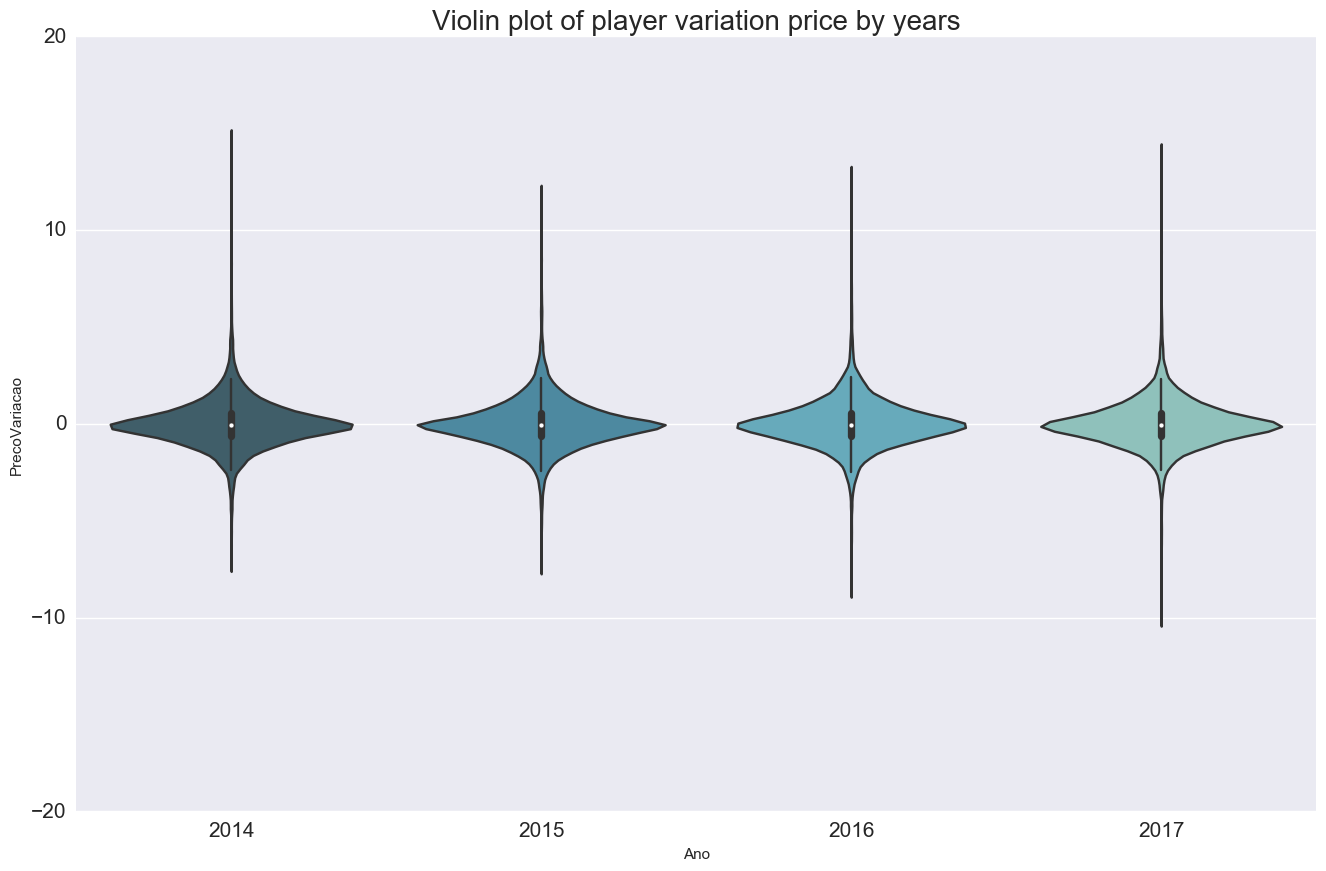

In [67]:
fig, ax = plt.subplots()
fig.set_size_inches(16,10)
vis = sns.violinplot(data = jogaram_all_years, x='Ano', y="PrecoVariacao", palette="GnBu_d")
vis.set(yticks=np.arange(-20,30,10))
vis.axes.set_title('Violin plot of player variation price by years',fontsize=20)
vis.tick_params(labelsize=15)
plt.show()

In [68]:
jogaram_all_years.groupby(['ClubeID','Ano']).mean().reset_index().head(10)

,ClubeID,Ano,Rodada,AtletaID,Participou,Pontos,PontosMedia,Preco,PrecoVariacao,FS,...,FC,GC,CA,CV,SG,DD,DP,GS,PosicaoID,ID
0,262.0,2014,19.737500,62406.694643,True,2.779857,2.685018,8.073893,-0.052036,0.928571,...,1.048214,0.000000,0.119643,0.007143,0.105357,0.101786,0.003571,0.083929,3.658929,262.0
1,262.0,2015,18.986965,67778.191806,True,2.581713,2.506890,8.905978,-0.027412,12.333333,...,11.426443,0.100559,1.919926,0.119181,1.145251,0.756052,0.000000,1.001862,3.711359,262.0
2,262.0,2016,19.371886,69475.081851,True,3.520302,3.728452,10.008274,0.064288,1.032028,...,0.852313,0.001779,0.110320,0.008897,0.149466,0.112100,0.000000,0.062278,3.701068,262.0
3,262.0,2017,19.851986,68684.620939,True,3.267112,3.254477,8.696137,-0.065469,12.001805,...,11.859206,0.019856,1.330325,0.036101,1.413357,0.554152,0.019856,0.561372,3.682310,262.0
4,263.0,2014,19.989130,60286.528986,True,2.166467,2.064656,6.362464,-0.035072,1.076087,...,1.085145,0.001812,0.155797,0.016304,0.092391,0.123188,0.000000,0.083333,3.751812,263.0
5,263.0,2016,19.013133,74837.765478,True,3.072026,3.130113,7.114409,0.077054,0.971857,...,1.024390,0.001876,0.165103,0.003752,0.136961,0.101313,0.003752,0.071295,3.735460,263.0
6,263.0,2017,19.830935,77284.696043,True,3.294299,3.421835,8.388471,0.028399,12.974820,...,13.996403,0.028777,2.154676,0.019784,1.917266,1.526978,0.143885,1.000000,3.660072,263.0
7,264.0,2014,19.408377,58757.553229,True,3.181361,3.279529,11.273316,0.019756,1.101222,...,0.954625,0.003490,0.122164,0.005236,0.136126,0.054101,0.001745,0.054101,3.724258,264.0
8,264.0,2015,18.590494,56332.338208,True,3.669927,3.473711,11.850530,0.015631,9.409506,...,8.349177,0.000000,1.495430,0.065814,2.053016,1.685558,0.003656,0.897623,3.700183,264.0
9,264.0,2016,19.461121,65478.426763,True,2.846383,3.173436,9.708354,-0.054033,0.983725,...,0.985533,0.001808,0.135624,0.009042,0.124774,0.074141,0.001808,0.075949,3.634720,264.0


### GENERATING TABLES WITH ATHLETES

In [69]:
atletas_all_years = atletas_all_years.drop_duplicates(['ID'])

In [70]:
atletas_all_years.head()

,ID,Apelido,ClubeID,PosicaoID,Ano
0,80583,Lucas Lima,277,4,2014
1,72079,Bruno Cortez,288,2,2014
2,86189,Mosquito,293,5,2014
3,68938,Giovanni Augusto,316,4,2014
4,68974,Marcão,316,5,2014


In [71]:
clubes_all_years.head()

,ID,Nome,Abreviacao,Slug
0,262,Flamengo,FLA,flamengo
1,263,Botafogo,BOT,botafogo
2,264,Corinthians,COR,corinthians
3,265,Bahia,BAH,bahia
4,266,Fluminense,FLU,fluminense


In [72]:
posicoes_all_years

,ID,Nome,Abreviacao
0,1,Goleiro,GOL
1,2,Lateral,LAT
2,3,Zagueiro,ZAG
3,4,Meia,MEI
4,5,Atacante,ATA
5,6,Técnico,TEC


In [73]:
atletas_all_years = atletas_all_years.merge(clubes_all_years[['ID','Abreviacao','Nome']], how='inner', left_on='ClubeID',\
                         right_on='ID')

atletas_all_years = atletas_all_years.merge(posicoes_all_years[['ID','Abreviacao']], how='inner', left_on='PosicaoID',\
                         right_on='ID')

atletas_all_years = atletas_all_years.drop(labels=['ID_y','ID'], axis = 1)

In [74]:
atletas_all_years = atletas_all_years.rename(columns={'ID_x':'ID_jogador','Nome':'nome_clube','Abreviacao_x':'abrev_clube',\
                                                     'Abreviacao_y':'posicao'})

In [75]:
atletas_all_years = atletas_all_years.drop_duplicates(['ID_jogador'])

In [76]:
atletas_all_years.head()

,ID_jogador,Apelido,ClubeID,PosicaoID,Ano,abrev_clube,nome_clube,posicao
0,80583,Lucas Lima,277,4,2014,SAN,Santos,MEI
2,88002,Serginho,277,4,2014,SAN,Santos,MEI
4,70132,Alan Santos,277,4,2014,SAN,Santos,MEI
6,78235,Leandrinho,277,4,2014,SAN,Santos,MEI
8,89637,Thiago Maia,277,4,2014,SAN,Santos,MEI


In [77]:
atletas_all_years = atletas_all_years.drop_duplicates()

In [78]:
atletas_all_years.to_csv('atletas_all_years.csv', sep='\t')

In [79]:
scouts_all_years.head()

,Rodada,ClubeID,AtletaID,Participou,Pontos,PontosMedia,Preco,PrecoVariacao,FS,PE,...,SG,DD,DP,GS,Ano,Apelido,PosicaoID,Abreviacao,ID,Nome
0,0,285,36443,False,0.0,0.00,9.00,0.00,0,0,...,0,0,0,0,2014,Dida,1,GOL,285,Internacional
1,1,285,36443,True,5.0,5.00,10.60,1.60,0,0,...,1,0,0,0,2014,Dida,1,GOL,285,Internacional
2,2,285,36443,True,-3.0,1.00,8.27,-2.33,2,0,...,0,0,0,2,2014,Dida,1,GOL,285,Internacional
3,3,285,36443,True,-2.6,-0.20,6.81,-1.46,0,2,...,0,0,0,1,2014,Dida,1,GOL,285,Internacional
4,4,285,36443,True,4.0,0.85,7.96,1.15,0,0,...,0,2,0,1,2014,Dida,1,GOL,285,Internacional


### Generating club scores round by round

In [80]:
treinadores = atletas_all_years.ID_jogador[atletas_all_years.PosicaoID == 6]

cols1 = ['Ano','Rodada', 'ClubeID', 'AtletaID', 'Participou', 'Pontos']
tabela_cartola = scouts_all_years[scouts_all_years.AtletaID.isin(treinadores)][cols1]

cols2 = ['Ano','Rodada', 'ClubeID', 'AtletaID', 'Participou', 'Pontos', 'Abreviacao']
tabela_cartola = tabela_cartola.merge(clubes_all_years[['ID','Abreviacao','Nome']], how='inner', left_on='ClubeID',\
                         right_on='ID')[cols2]

cols3 = ['Ano','Rodada', 'ClubeID', 'AtletaID', 'Apelido','Participou', 'Pontos', 'Abreviacao']
tabela_cartola = tabela_cartola.merge(atletas_all_years[['ID_jogador','Apelido']], how='inner', left_on='AtletaID',\
                         right_on='ID_jogador')[cols3]

tabela_cartola = tabela_cartola.sort_values(by=['Ano', 'ClubeID', 'Rodada'])

tabela_cartola['Apelido'] = tabela_cartola.apply(lambda x: str(x.Apelido).lower(), axis=1)

tabela_cartola = tabela_cartola.drop_duplicates()

tabela_cartola

,Ano,Rodada,ClubeID,AtletaID,Apelido,Participou,Pontos,Abreviacao
2366,2014,0,262,79019,jayme de almeida,False,0.00,FLA
2368,2014,1,262,79019,jayme de almeida,True,2.35,FLA
2370,2014,2,262,79019,jayme de almeida,True,1.59,FLA
2372,2014,3,262,79019,jayme de almeida,True,5.79,FLA
2374,2014,4,262,79019,jayme de almeida,True,0.16,FLA
821,2014,11,262,41327,vanderlei luxemburgo,False,0.00,FLA
823,2014,12,262,41327,vanderlei luxemburgo,True,4.39,FLA
825,2014,13,262,41327,vanderlei luxemburgo,True,1.65,FLA
827,2014,14,262,41327,vanderlei luxemburgo,True,4.30,FLA
829,2014,15,262,41327,vanderlei luxemburgo,True,3.87,FLA


In [132]:
tabela_quase_final = pd.DataFrame(tabela_cartola.groupby(['Ano','Abreviacao'])['Pontos'].mean())
tabela_final = tabela_quase_final.reset_index().sort_values(by=['Ano','Pontos'], ascending = [True, False])
tabela_final

,Ano,Abreviacao,Pontos
8,2014,CRU,4.189744
6,2014,COR,3.890256
14,2014,INT,3.827179
17,2014,SAO,3.664103
16,2014,SAN,3.624717
2,2014,CAM,3.485500
10,2014,FLA,3.440000
13,2014,GRE,3.286552
12,2014,GOI,3.276579
11,2014,FLU,3.163333


In [133]:
tabela

,Ano,abrev_clube_casa,pts_casa,pts_fora,pts_total
8,2014,CRU,47,33,80
17,2014,SAO,39,31,70
6,2014,COR,42,27,69
14,2014,INT,45,24,69
2,2014,CAM,41,21,62
11,2014,FLU,39,22,61
13,2014,GRE,40,21,61
3,2014,CAP,35,19,54
16,2014,SAN,33,20,53
10,2014,FLA,35,17,52


In [134]:
cols_final = ['Ano', 'Abreviacao', 'pts_total', 'Pontos']
tabela_unificada = tabela.merge(tabela_final, how = 'inner', left_on = ['Ano','abrev_clube_casa'], right_on=['Ano','Abreviacao'])[cols_final]
tabela_unificada = tabela_unificada.rename(columns={'pts_total':'pts_real','Pontos':'pts_cartola'})
tabela_unificada.head()

,Ano,Abreviacao,pts_real,pts_cartola
0,2014,CRU,80,4.189744
1,2014,SAO,70,3.664103
2,2014,COR,69,3.890256
3,2014,INT,69,3.827179
4,2014,CAM,62,3.485500


In [135]:
tabela_unificada['rank'] = np.where(tabela_unificada['Ano']==2014, [i+1 for i in range(0,len(tabela_unificada))], '')
tabela_unificada.head()

,Ano,Abreviacao,pts_real,pts_cartola,rank
0,2014,CRU,80,4.189744,1
1,2014,SAO,70,3.664103,2
2,2014,COR,69,3.890256,3
3,2014,INT,69,3.827179,4
4,2014,CAM,62,3.485500,5


In [136]:
tabela_unificada.to_csv('tabela_unificada.csv', sep='\t')

In [137]:
tabela_unificada = tabela_unificada.sort_values(by=['Ano','pts_cartola'], ascending=[True, False])
tabela_unificada['rank_cartola'] = np.where(tabela_unificada['Ano']==2014, [i+1 for i in range(0, len(tabela_unificada))], '')
tabela_unificada = tabela_unificada.sort_values(by=['Ano','pts_real'], ascending=[True, False])
tabela_unificada.Abreviacao[tabela_unificada['Ano'] == 2014]

0     CRU
1     SAO
2     COR
3     INT
4     CAM
6     GRE
5     FLU
7     CAP
8     SAN
9     FLA
10    SPT
13    GOI
11    CFC
12    FIG
14    CHA
15    PAL
16    VIT
17    BAH
18    BOT
19    CRI
Name: Abreviacao, dtype: object

In [138]:
rank_real = tabela_unificada[tabela_unificada.Ano == 2014]['rank']
rank_cartola = tabela_unificada[tabela_unificada.Ano == 2014]['rank_cartola']

In [139]:
export = tabela_unificada[tabela_unificada.Ano == 2014][['Ano','rank','rank_cartola']]
export = export[['rank','rank_cartola','Ano']]
export = export.astype(np.float)
#export.to_csv('export.csv', sep='\t')

In [140]:
export

,rank,rank_cartola,Ano
0,1.0,1.0,2014.0
1,2.0,4.0,2014.0
2,3.0,2.0,2014.0
3,4.0,3.0,2014.0
4,5.0,6.0,2014.0
6,7.0,8.0,2014.0
5,6.0,10.0,2014.0
7,8.0,15.0,2014.0
8,9.0,5.0,2014.0
9,10.0,7.0,2014.0


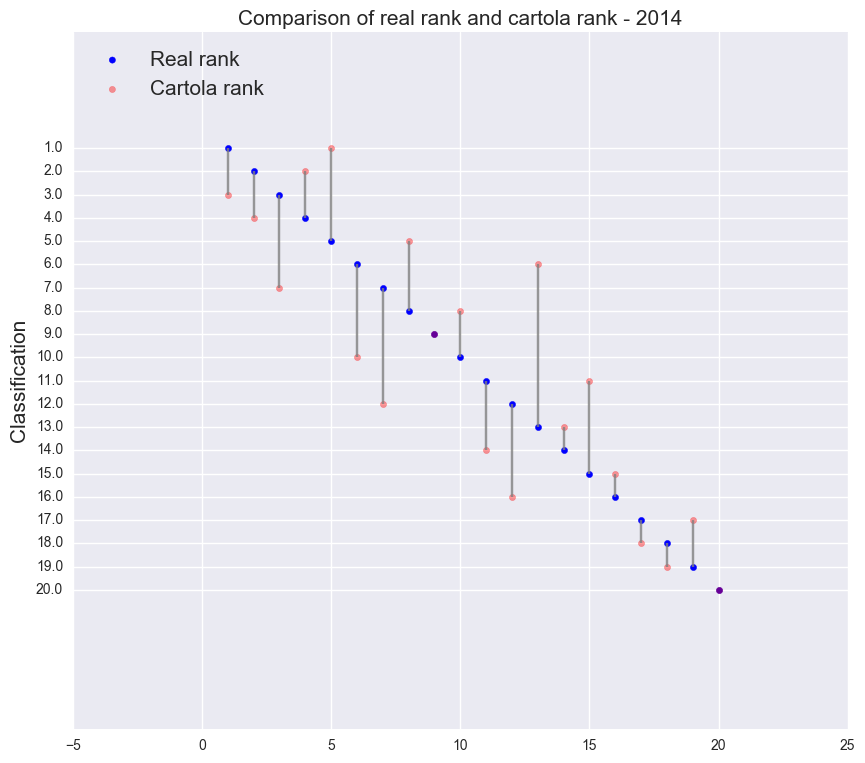

In [142]:
# libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a dataframe
value1=np.random.uniform(size=20)
value2=value1+np.random.uniform(size=20)/4
#df = pd.DataFrame({'group':list(map(chr, range(65, 85))), 'value1':value1 , 'value2':value2 })
df = pd.DataFrame({'group':list(map(chr, range(65, 85))), 'rank':export['rank'] , 'rank_cartola':export['rank_cartola'] })

# Reorder it following the values of the first value:
ordered_df = df.sort_values(by='rank', ascending = False)
my_range=range(1,len(df.index)+1)

fig_size = [0,0]


labels = tabela_unificada.Abreviacao[tabela_unificada['Ano'] == 2014]

'''for label, x, y in zip(labels, export['rank'], export['rank_cartola']):
    plt.annotate(
        label,
        xy=(x, y), 
        xytext=(-20, 20),
        textcoords='offset points', ha='left', va='center',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.2),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
'''
# The vertical plot is made using the Vline function
plt.vlines(x=my_range, ymin=ordered_df['rank'], ymax=ordered_df['rank_cartola'], color='grey', alpha=0.8)
plt.scatter( my_range, ordered_df['rank'], color='blue', alpha=1, label='Real rank')
plt.scatter( my_range, ordered_df['rank_cartola'], color='red', alpha=0.4 , label='Cartola rank')

#fig_size[0], fig_size[1] = 10, 9
#plt.rcParams["figure.figsize"] = fig_size

plt.legend(loc=2, fontsize = 15)
 
# Add title and axis names
plt.yticks(my_range, ordered_df['rank'])
#plt.xticks(my_range, ordered_df['rank'])
plt.title("Comparison of real rank and cartola rank - 2014", loc='center', fontsize = 15)
plt.ylabel('Classification', fontsize = 15)
#plt.xlabel('Group')

# Exploratory Data Analysis

### Plot of.....

In [143]:
atletas_all_years.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2242 entries, 0 to 3973
Data columns (total 8 columns):
ID_jogador     2242 non-null int64
Apelido        2242 non-null object
ClubeID        2242 non-null int64
PosicaoID      2242 non-null int64
Ano            2242 non-null int64
abrev_clube    2242 non-null object
nome_clube     2242 non-null object
posicao        2242 non-null object
dtypes: int64(4), object(4)
memory usage: 237.6+ KB


In [144]:
partidas_all_years.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1520 entries, 0 to 379
Data columns (total 8 columns):
Ano                1520 non-null int64
CasaID             1520 non-null int64
ID                 1520 non-null int64
PlacarCasa         1519 non-null float64
PlacarVisitante    1519 non-null float64
Resultado          1139 non-null object
Rodada             1520 non-null int64
VisitanteID        1520 non-null int64
dtypes: float64(2), int64(5), object(1)
memory usage: 106.9+ KB


### Joint Distribution ClubeID x PosicaoID


In [145]:
atletas_all_years.head()

,ID_jogador,Apelido,ClubeID,PosicaoID,Ano,abrev_clube,nome_clube,posicao
0,80583,Lucas Lima,277,4,2014,SAN,Santos,MEI
2,88002,Serginho,277,4,2014,SAN,Santos,MEI
4,70132,Alan Santos,277,4,2014,SAN,Santos,MEI
6,78235,Leandrinho,277,4,2014,SAN,Santos,MEI
8,89637,Thiago Maia,277,4,2014,SAN,Santos,MEI


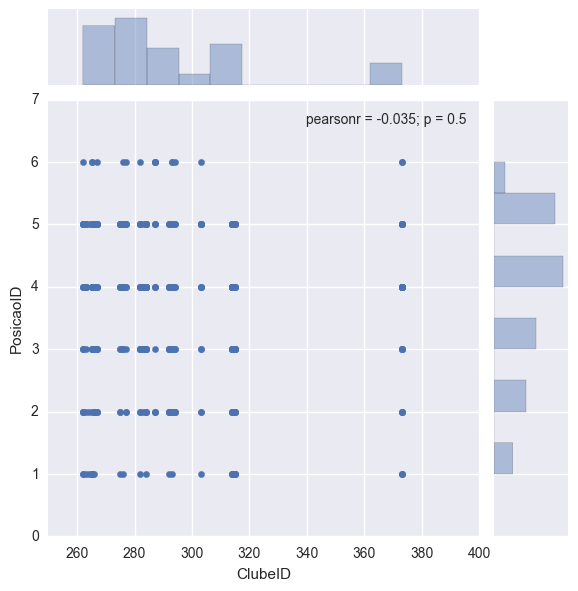

In [105]:
sns.jointplot(x="ClubeID", y="PosicaoID", data=atletas_all_years[atletas_all_years.Ano == 2017], size=6, xlim=[250,400]);

Here we plot the joint plot of ClubeID (teams) and PositionID (players positions in field)


Notice that:

* We have more players on "MEIA" position 
* The team with more players is the one with ClubeID nearest 260.

### Histogram (number of observations for each value on each columns) of Athletes_all_years table

OBS: PosicaoID é a posição do jogador em campo (1 = zagueiro, 2 = lateral, ..., 5 = atacante, 6 = técnico)

In [106]:
atletas_all_years.head()

,ID_jogador,Apelido,ClubeID,PosicaoID,Ano,abrev_clube,nome_clube,posicao
0,80583,Lucas Lima,277,4,2014,SAN,Santos,MEI
2,88002,Serginho,277,4,2014,SAN,Santos,MEI
4,70132,Alan Santos,277,4,2014,SAN,Santos,MEI
6,78235,Leandrinho,277,4,2014,SAN,Santos,MEI
8,89637,Thiago Maia,277,4,2014,SAN,Santos,MEI


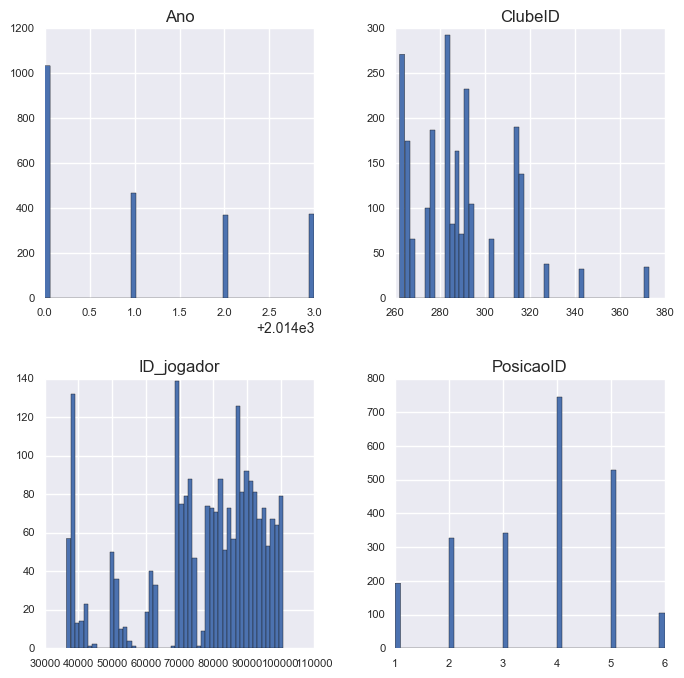

In [107]:
atletas_all_years.hist(figsize=(8, 8), bins=50, xlabelsize=8, ylabelsize=8);

In [108]:
atletas_all_years.sample(10).sort_values("ID_jogador")

,ID_jogador,Apelido,ClubeID,PosicaoID,Ano,abrev_clube,nome_clube,posicao
74,50908,Wellington Bruno,288,4,2014,CRI,Criciúma,MEI
2144,62070,Marcelo Cordeiro,292,2,2014,SPO,Sport,LAT
984,69268,Víctor Cáceres,262,4,2014,FLA,Flamengo,MEI
1935,70046,Victor Ferraz,277,2,2014,SAN,Santos,LAT
3957,70165,Maranhão,327,5,2016,AME,América-MG,ATA
2647,72588,Lisca,285,6,2016,INT,Internacional,TEC
1495,79287,Enrique Meza,315,3,2014,CHA,Chapecoense,ZAG
3927,82616,Conrado,314,5,2015,AVA,Avaí,ATA
2673,93028,Danny Sergio,290,6,2015,GOI,Goiás,TEC
1328,98382,João Victor,373,4,2017,ACG,Atlético-GO,MEI


### Interactive Plots on TABLEAU

* Number of Players, with positions, by year: [link](https://public.tableau.com/profile/renato.aranha#!/vizhome/qtd_jog_por_posicao/Planilha1)
